<a href="https://colab.research.google.com/github/tauseefj/scaler/blob/main/porfolio/unsupervised/countryaid/ClusteringCountriesForStrategicAidAllocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

HELP International is an NGO that is committed to fight poverty in the world. It provides people of backward countries the basic amenities and relief during the time of disasters and natural calamities.

They have raised $10M. They want to decide on how to use this money effectively and strategically. Our Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the NGO needs to focus on the most.


##Need of Solving the Problem Statement

- **Strategic Resource Allocation** : Identify the countries that require most assistance so that the resources($10M worth of aid) are optimally utilized and poverty can be addressed effectively.
- **Data driven decision making**: Traditional methods of aid allocation may lack precision and objectivity. Leveraging data science techniques allows for a more systematic and evidence-based approach to identifying countries in dire need, ensuring that resources are allocated where they can make the most significant impact
- **Targetted Intervention**: By categorizing countries based on socio-economic and health factors, HELP International can tailor interventions to address specific challenges faced by different regions. This targeted approach enhances the effectiveness and efficiency of aid delivery, leading to better outcomes for the communities served.

##Use of Solving the Problem Statement

- **Country Categorization**:
Utilizing socio-economic and health factors, we will categorize countries into distinct groups based on their level of development and need for aid. This segmentation enables HELP International to prioritize assistance to countries facing the most severe challenges.
- **Strategic Decision Support**:
The data-driven insights provided by the analysis will inform the CEO's decision-making process regarding aid allocation. By highlighting countries with the greatest need, data science empowers HELP International to make informed, strategic decisions that maximize the impact of available resources.
- **Resource Optimization**:
By focusing aid efforts on countries identified as being in the direst need, HELP International can optimize the allocation of its $10 million funds. This ensures that resources are directed where they can have the most significant positive impact on poverty alleviation and community development.



##Benefits

- **Maximized Impact**:
By targeting aid to countries with the greatest need, HELP International can maximize the impact of its resources, effectively addressing poverty and improving living conditions for vulnerable populations.
- **Efficient Resource Utilization**:
Data-driven aid allocation enables HELP International to optimize the utilization of its funds, ensuring that every dollar is directed toward initiatives that have the greatest potential for positive change.
- **Improved Accountability**:
Using objective criteria to prioritize aid allocation enhances transparency and accountability in decision-making. This helps build trust with stakeholders and donors by demonstrating a commitment to evidence-based practices and results-driven outcomes.


#Data handling

##Download the dataset

In [1]:
import gdown
file_id="1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj"
output="aid.csv"
gdown.download(f'https://drive.google.com/uc?export=download&id={file_id}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj
To: /content/aid.csv
100%|██████████| 9.23k/9.23k [00:00<00:00, 11.9MB/s]


'aid.csv'

##Read and analyse the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
import logging
import warnings

logging.getLogger().setLevel(logging.WARNING)
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("aid.csv", index_col="country")
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [5]:
df.shape

(167, 9)

In [6]:
df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [8]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [9]:
df.duplicated().sum()

0

In [10]:
for col in df.columns:
    print('Column {} - has {} missing values.'.format(col, df[col].isnull().sum()))

Column child_mort - has 0 missing values.
Column exports - has 0 missing values.
Column health - has 0 missing values.
Column imports - has 0 missing values.
Column income - has 0 missing values.
Column inflation - has 0 missing values.
Column life_expec - has 0 missing values.
Column total_fer - has 0 missing values.
Column gdpp - has 0 missing values.


###Observations
- Data is available for 167 countries
- There are no duplicates
- There are no missing values
- All columns are numerical
- Basic statistics(avg, min, max) for each column is provided above

##Outlier detection

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

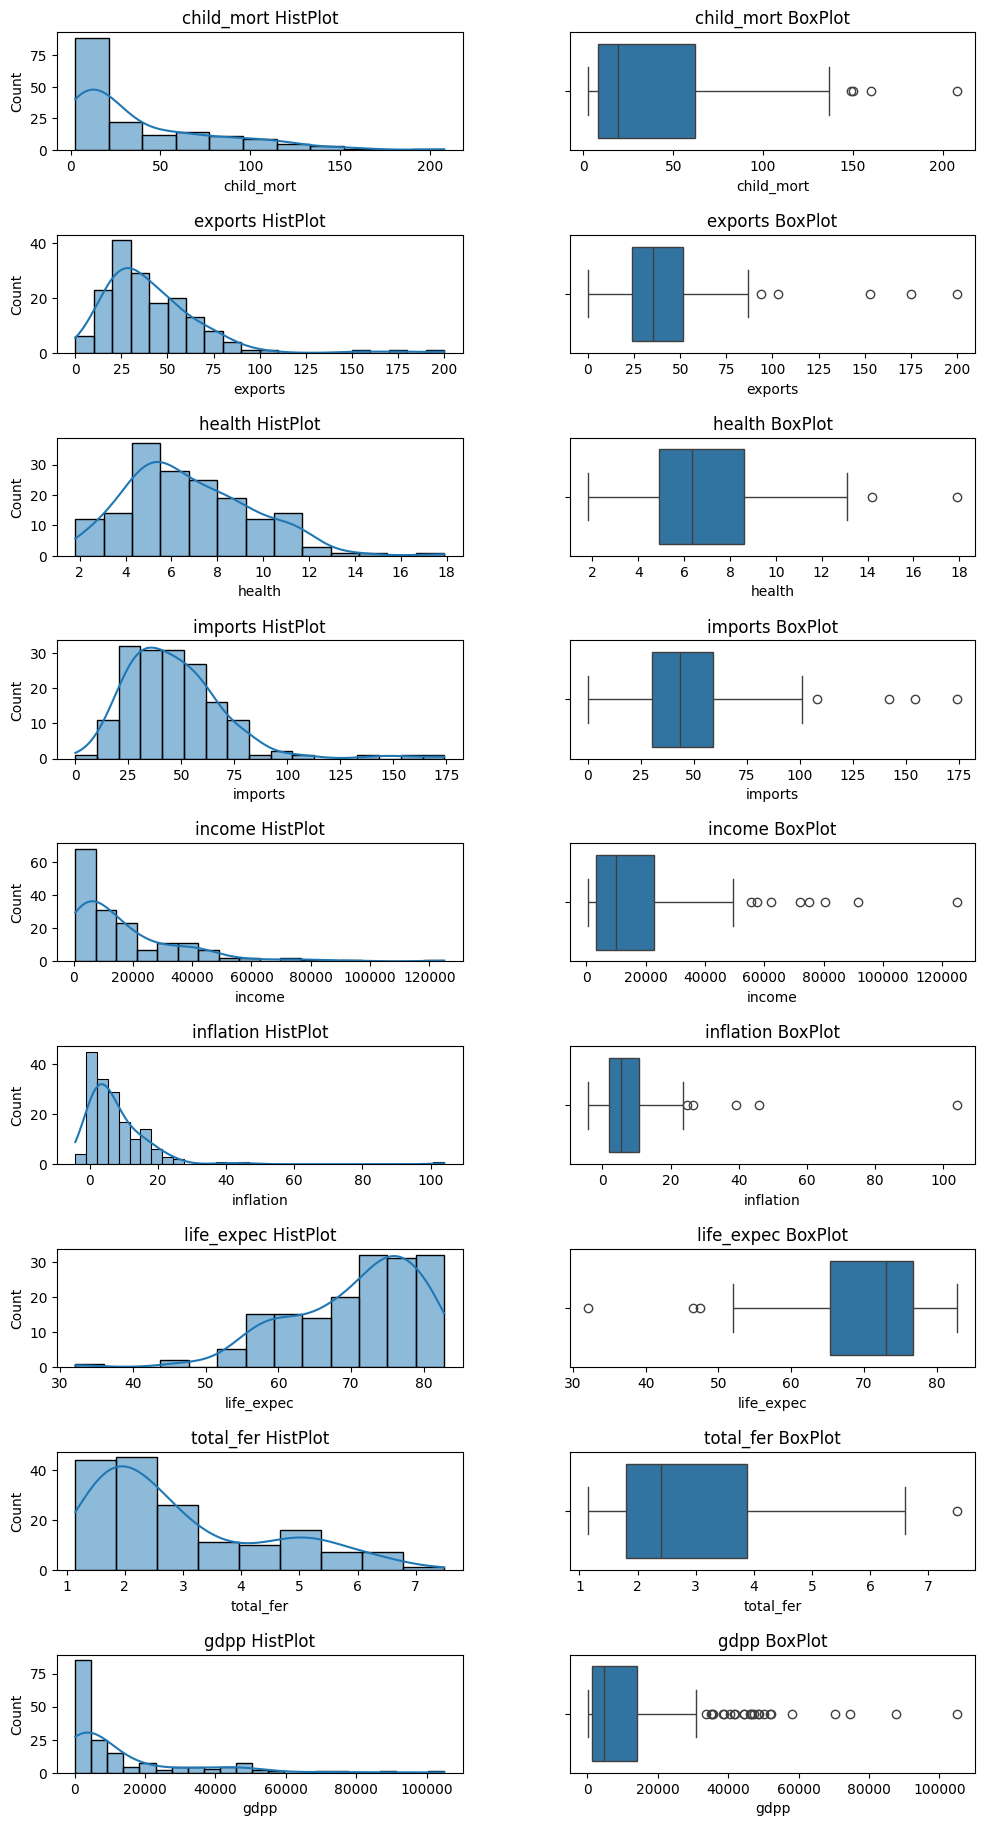

In [12]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

numeric_cols = df.columns.to_list()

#Start the plotting
fig, axis = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(10, len(numeric_cols) * 2), sharex=False, sharey=False)
fig.tight_layout(h_pad=4, w_pad=4)

index = 0
for row in range(len(numeric_cols)):
  sns.histplot(df[numeric_cols[index]], ax=axis[row, 0], kde=True).set(title=numeric_cols[index]+" HistPlot")
  sns.boxplot(x=df[numeric_cols[index]], ax=axis[row, 1]).set(title=numeric_cols[index]+" BoxPlot")
  index += 1
plt.show()

In [13]:
for i in df.columns.to_list():
  temp=df[i].describe()
  IQR=temp['75%']-temp['25%']
  LO=temp['25%']-1.5*IQR
  HO=temp['75%']+1.5*IQR
  if (temp['min']<LO) or (temp['max']>HO):
      count=len(df[df[i] < LO].index)
      count=count+len(df[df[i] > HO].index)
      percent=round((count/len(df[i].index))*100,2)
      #print("{} has {}% outliers".format(i,per))
      print("The column {} has {} outliers that equates to {} % of all values".format(i,count,percent))
  else:
      print("The column {} has no outliers".format(i))

The column child_mort has 4 outliers that equates to 2.4 % of all values
The column exports has 5 outliers that equates to 2.99 % of all values
The column health has 2 outliers that equates to 1.2 % of all values
The column imports has 4 outliers that equates to 2.4 % of all values
The column income has 8 outliers that equates to 4.79 % of all values
The column inflation has 5 outliers that equates to 2.99 % of all values
The column life_expec has 3 outliers that equates to 1.8 % of all values
The column total_fer has 1 outliers that equates to 0.6 % of all values
The column gdpp has 25 outliers that equates to 14.97 % of all values


###Observations
- Outliers exists in all the features
- We have arrived at the percentage outliers in all the cases

##Heat Map for all variables/Bivariate analysis

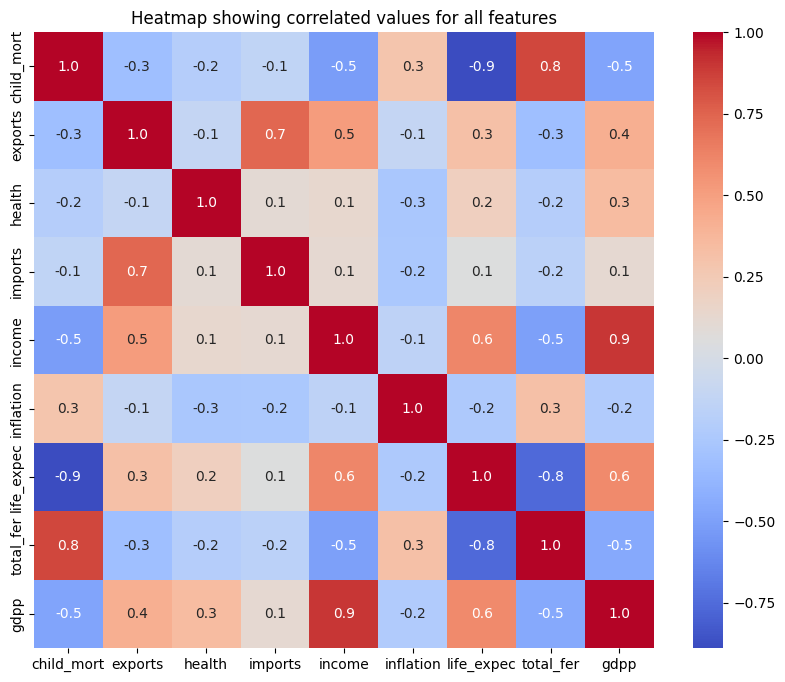

In [14]:
cor=round(df.corr(),2)
plt.figure(figsize=(10,8))
ax=plt.axes()
sns.heatmap(cor,annot=True,fmt='.1f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap showing correlated values for all features')
plt.show()

###Observations
The below variable pairs are highly correlated
- Total Fertility and life expectency are negatively correlated
- Total Fertility and child moratlity
- Life expectancy and child mortality are negatively correlated
- income and gdpp
- imports and exports

##Pair plots

<IPython.core.display.Javascript object>

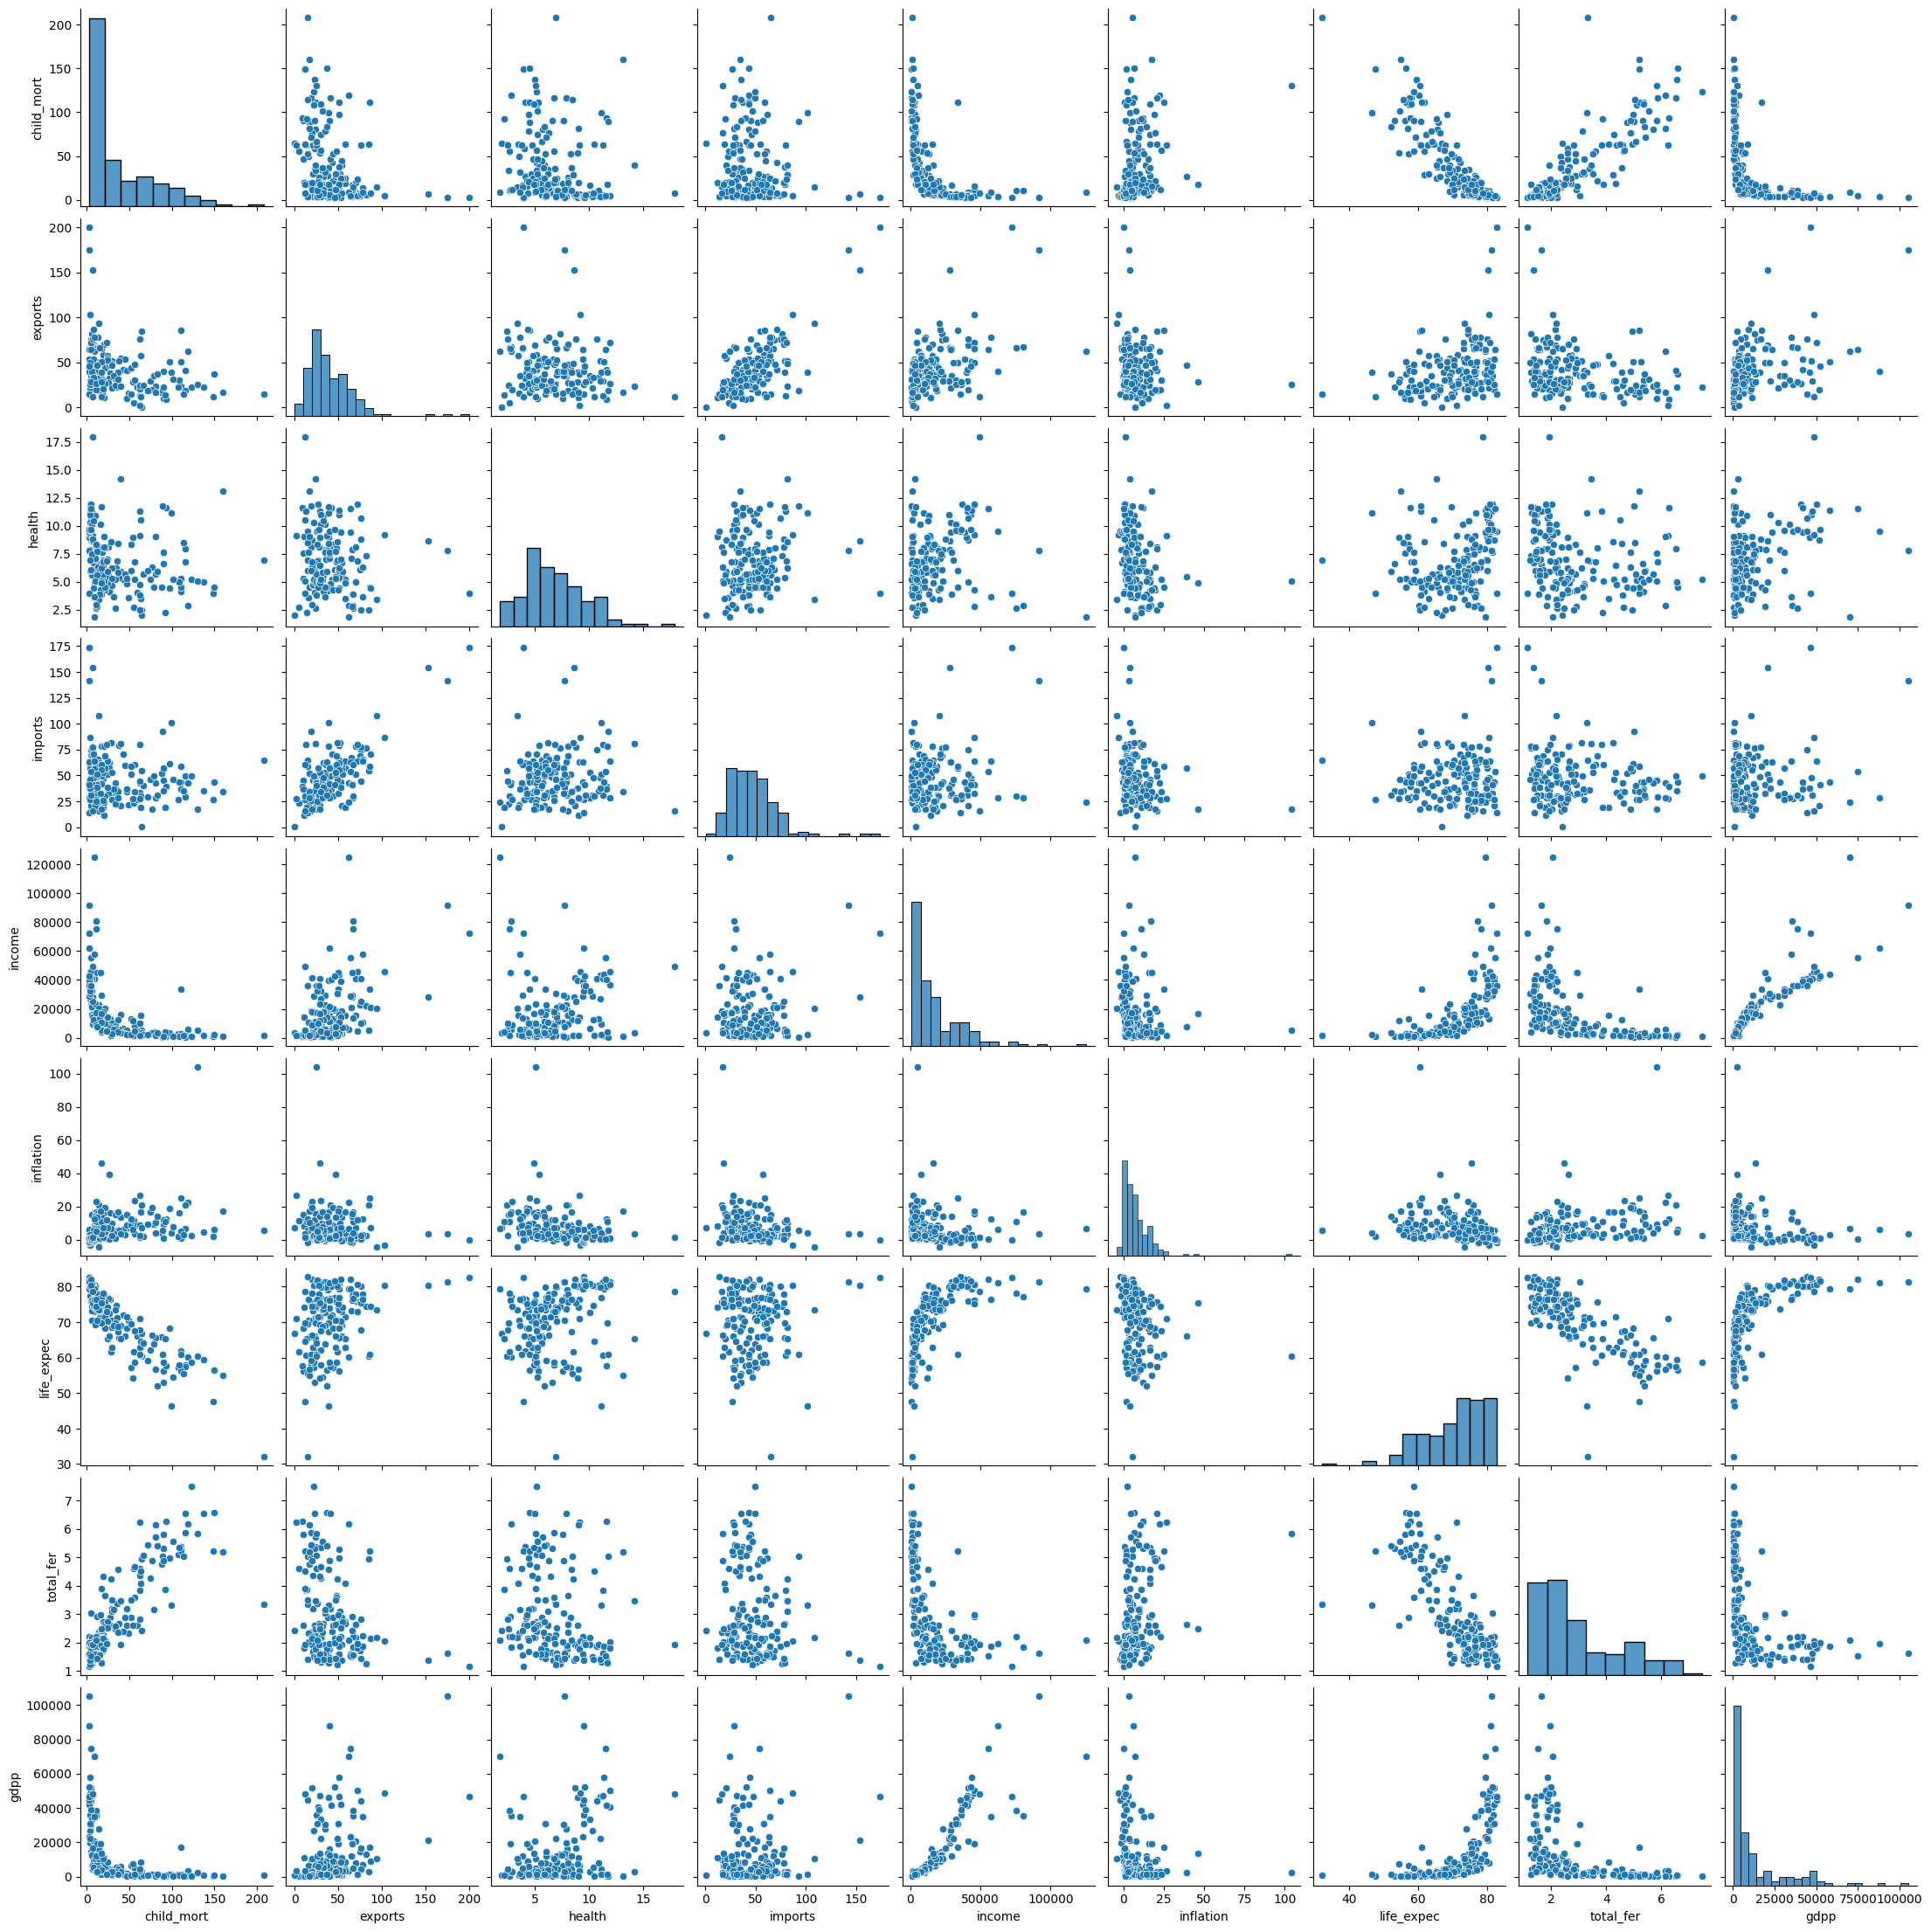

In [15]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
sns.pairplot(df)
plt.show()

In [16]:
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

<IPython.core.display.Javascript object>

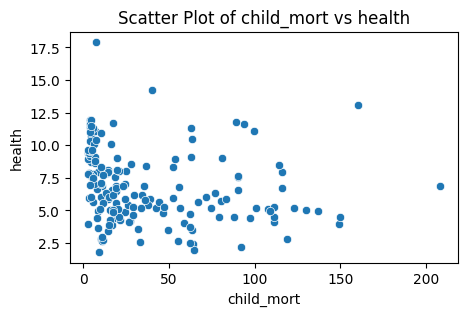

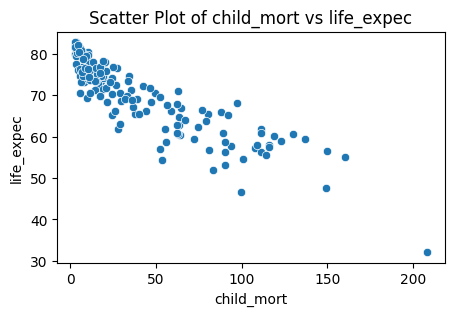

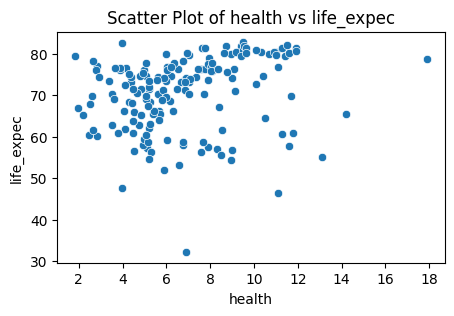

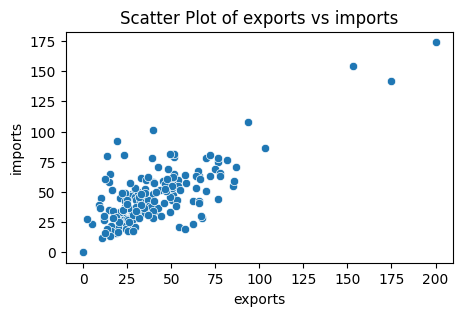

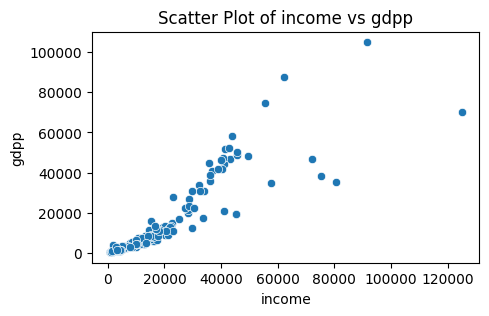

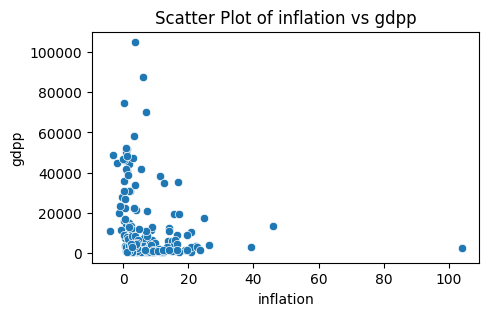

In [17]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
pairs = [
    ('child_mort', 'health'),
    ('child_mort', 'life_expec'),
    ('health', 'life_expec'),
    ('exports', 'imports'),
    ('income', 'gdpp'),
    ('inflation', 'gdpp')
]

# Create scatter plots for each pair of variables
for x, y in pairs:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

###Observations
Some of the features seem to be quite right-skewed:

- child_mort
- exports
- imports
- income
- inflation
- total_fer
- gdpp

1 feature seem to be left-skewed:

- left_expec

1 feature seem to have a more or less normal distribution:

- health

#Hypothesis Testing

##Health Spending and Life Expectancy

###Null Hypo: Hypothesis: Increased health spending (% of GDP) does not lead to higher life expectancy (Life_expec).

In [18]:
from scipy.stats import pearsonr
# Assuming your data is in a DataFrame called 'df' with columns 'Health' and 'Life_expec'
health_spending = df['health']  # Health spending (% of GDP)
life_expectancy = df['life_expec']  # Life expectancy

# Step 2: Calculate the Pearson correlation and perform a t-test
correlation_coefficient, p_value = pearsonr(health_spending, life_expectancy)

# Display the results
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject Null Hypo: There is a statistically significant relationship between health spending and life expectancy.")
else:
    print("Failed to reject null hypo: There is no statistically significant relationship between health spending and life expectancy.")

Correlation coefficient: 0.21069212144020807
p-value: 0.00627526305080419
Reject Null Hypo: There is a statistically significant relationship between health spending and life expectancy.


In [19]:
from scipy import stats

# Define a threshold for high vs. low health spending
threshold = df['health'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the health spending threshold
high_health_spending = df[df['health'] > threshold]['life_expec']
low_health_spending = df[df['health'] <= threshold]['life_expec']

# Conduct a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between countries with high and low health spending.")

T-statistic: 2.934
P-value: 0.004
Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.


###Observation
- We conducted pearson as well as ttest above and we find that countries with high spending has higher life expectancy

##Fertility and Development:

###Correlation Analysis

In [20]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (for linear relationship)
pearson_corr, pearson_p_value = pearsonr(df['total_fer'], df['income'])

print("Pearson Correlation:", pearson_corr)
print("p-value (Pearson):", pearson_p_value)

# Spearman correlation (for non-linear relationship)
spearman_corr, spearman_p_value = spearmanr(df['total_fer'], df['income'])

print("Spearman Correlation:", spearman_corr)
print("p-value (Spearman):", spearman_p_value)


Pearson Correlation: -0.5018400532297552
p-value (Pearson): 4.8858748799787085e-12
Spearman Correlation: -0.7401341177563477
p-value (Spearman): 3.0619449190531437e-30


####Observations
- A negative correlation coefficient supports the hypothesis that higher fertility rates are associated with lower income.
- The correlation is statistically significant, suggesting evidence for a relationship between fertility rates and income.

###Ttest

In [21]:
# Define a threshold for high vs. low fertility
threshold = df['total_fer'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the fertility threshold
high_fertility = df[df['total_fer'] > threshold]['income']
low_fertility = df[df['total_fer'] <= threshold]['income']

print('Mean of high fertility income is {}',high_fertility.mean())
print('Mean of low fertility income is {}', low_fertility.mean())

# Conduct a t-test to compare the means of income
t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between countries with high and low fertility rates.")

Mean of high fertility income is {} 6721.134146341464
Mean of low fertility income is {} 27200.352941176472
T-statistic: -8.085
P-value: 0.000
Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.


####Observations

- There is a statistically significant difference in income between countries with high and low fertility rates.
- Countries with higher fertility rates have lower income per person based on mean income derived above

##Income and Child Mortality

###Correlation

In [22]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (for linear relationship)
pearson_corr, pearson_p_value = pearsonr(df['income'], df['child_mort'])

print("Pearson Correlation:", pearson_corr)
print("p-value (Pearson):", pearson_p_value)

# Spearman correlation (for non-linear relationship)
spearman_corr, spearman_p_value = spearmanr(df['income'], df['child_mort'])

print("Spearman Correlation:", spearman_corr)
print("p-value (Spearman):", spearman_p_value)


Pearson Correlation: -0.5243150164994348
p-value (Pearson): 3.5388013816301654e-13
Spearman Correlation: -0.8667875995961556
p-value (Spearman): 9.86358079006549e-52


####Observations
- A negative correlation coefficient here supports the hypothesis that higher income is associated with lower child mortality.
- A p-value less than 0.05 here suggests that the correlation is statistically significant.

##Ttest

In [23]:
from scipy.stats import ttest_ind

# Define a threshold for high vs. low income (using median)
income_threshold = np.median(df['income'])

# Split data into high and low income groups
high_income_child_mort = df[df['income'] > income_threshold]['child_mort']
low_income_child_mort = df[df['income'] <= income_threshold]['child_mort']

print('Mean of high income child mort is {}',high_income_child_mort.mean())
print('Mean of low income child mort is {}', low_income_child_mort.mean())

# Perform an independent t-test
t_stat, p_value = ttest_ind(high_income_child_mort, low_income_child_mort)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant difference in child mortality between high and low income groups.")
else:
    print("No significant difference in child mortality between high and low income groups.")


Mean of high income child mort is {} 13.13734939759036
Mean of low income child mort is {} 63.103571428571435
t-statistic: -10.186018565020449
p-value: 3.2785691051974e-19
Significant difference in child mortality between high and low income groups.


####Observations
- Higher income is associated with lower child mortality rates.
- There exists a statistically significant difference in child mortality rates between high-income and low-income countries.

##Inflation and Economic Stability

###Correlation

In [24]:
from scipy.stats import pearsonr, spearmanr

# Pearson correlation (for linear relationship)
pearson_corr, pearson_p_value = pearsonr(df['inflation'], df['gdpp'])

print("Pearson Correlation:", pearson_corr)
print("p-value (Pearson):", pearson_p_value)

# Spearman correlation (for non-linear relationship)
spearman_corr, spearman_p_value = spearmanr(df['inflation'], df['gdpp'])

print("Spearman Correlation:", spearman_corr)
print("p-value (Spearman):", spearman_p_value)

Pearson Correlation: -0.22163105810153869
p-value (Pearson): 0.003995984320917072
Spearman Correlation: -0.3959857047350111
p-value (Spearman): 1.177388770160777e-07


####Observations
- A negative correlation coefficient here supports the hypothesis that higher inflation is associated with lower gdpp.
- A p-value less than 0.05 here suggests that the correlation is statistically significant.

###Ttest

In [25]:
from scipy.stats import ttest_ind

# Define a threshold for high vs. low income (using median)
inflation_threshold = np.median(df['inflation'])

# Split data into high and low income groups
high_inflation_gdpp = df[df['inflation'] > inflation_threshold]['gdpp']
low_inflation_gdpp = df[df['inflation'] <= inflation_threshold]['gdpp']

print('Mean of high inflation gdpp is ',high_inflation_gdpp.mean())
print('Mean of low inflation gdpp is ', low_inflation_gdpp.mean())

# Perform an independent t-test
t_stat, p_value = ttest_ind(high_inflation_gdpp, low_inflation_gdpp)

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant difference in gdpp between high and low inflation countries.")
else:
    print("No significant difference in gdpp between high and low inflation countries.")


Mean of high inflation gdpp is  7890.8674698795185
Mean of low inflation gdpp is  17977.04761904762
t-statistic: -3.6881176832049887
p-value: 0.000306330363917195
Significant difference in gdpp between high and low inflation countries.


####Observations
- Higher inflation is associated with lower gdpp.
- There exists a statistically significant difference in gdpp between high-inflation and low-inflation countries.

#Feature Engineering and Scaling

##Feature engineering

In [26]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler

In [27]:
def transform(data,function):
    lam = []
    for col in data.columns:
        if abs(data[col].skew()) > 0.75:
            if function == boxcox:
                data[col], lam_val = function(data[col] + abs(df.min().min())+0.001)
                lam.append(lam_val)
            else:
                data[col] = function(data[col] + abs(df.min().min())+0.001)
                # inflation is the only feature with negative values; to make the log transform possible,
                ## I added the lowest value of inflation +0.001 to make all values positive
    if function == boxcox:
        return data, lam
    else:
        return data

In [28]:
boxcox_data = df.copy(deep=True)
boxcox_data, lambda_list = transform(boxcox_data, boxcox) #storing the lambda values of boxcox transform in a separate list
boxcox_data.skew()

child_mort    0.062932
exports       0.030569
health        0.705746
imports       0.069233
income       -0.035718
inflation     0.418363
life_expec   -0.182170
total_fer     0.199942
gdpp          0.001558
dtype: float64

In [29]:
def normality_check(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. The variable is NOT normally distributed.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. The Variable is normally distributed'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))



In [30]:
normality_check(boxcox_data)

"child_mort" skew: 0.06. The Variable is normally distributed
"exports" skew: 0.03. The Variable is normally distributed
"health" skew: 0.71. The Variable is normally distributed
"imports" skew: 0.07. The Variable is normally distributed
"income" skew: -0.04. The Variable is normally distributed
"inflation" skew: 0.42. The Variable is normally distributed
"life_expec" skew: -0.18. The Variable is normally distributed
"total_fer" skew: 0.2. The Variable is normally distributed
"gdpp" skew: 0.0. The Variable is normally distributed


The data is now normally distributed

<IPython.core.display.Javascript object>

Pairplot - Data BoxCox Transformed


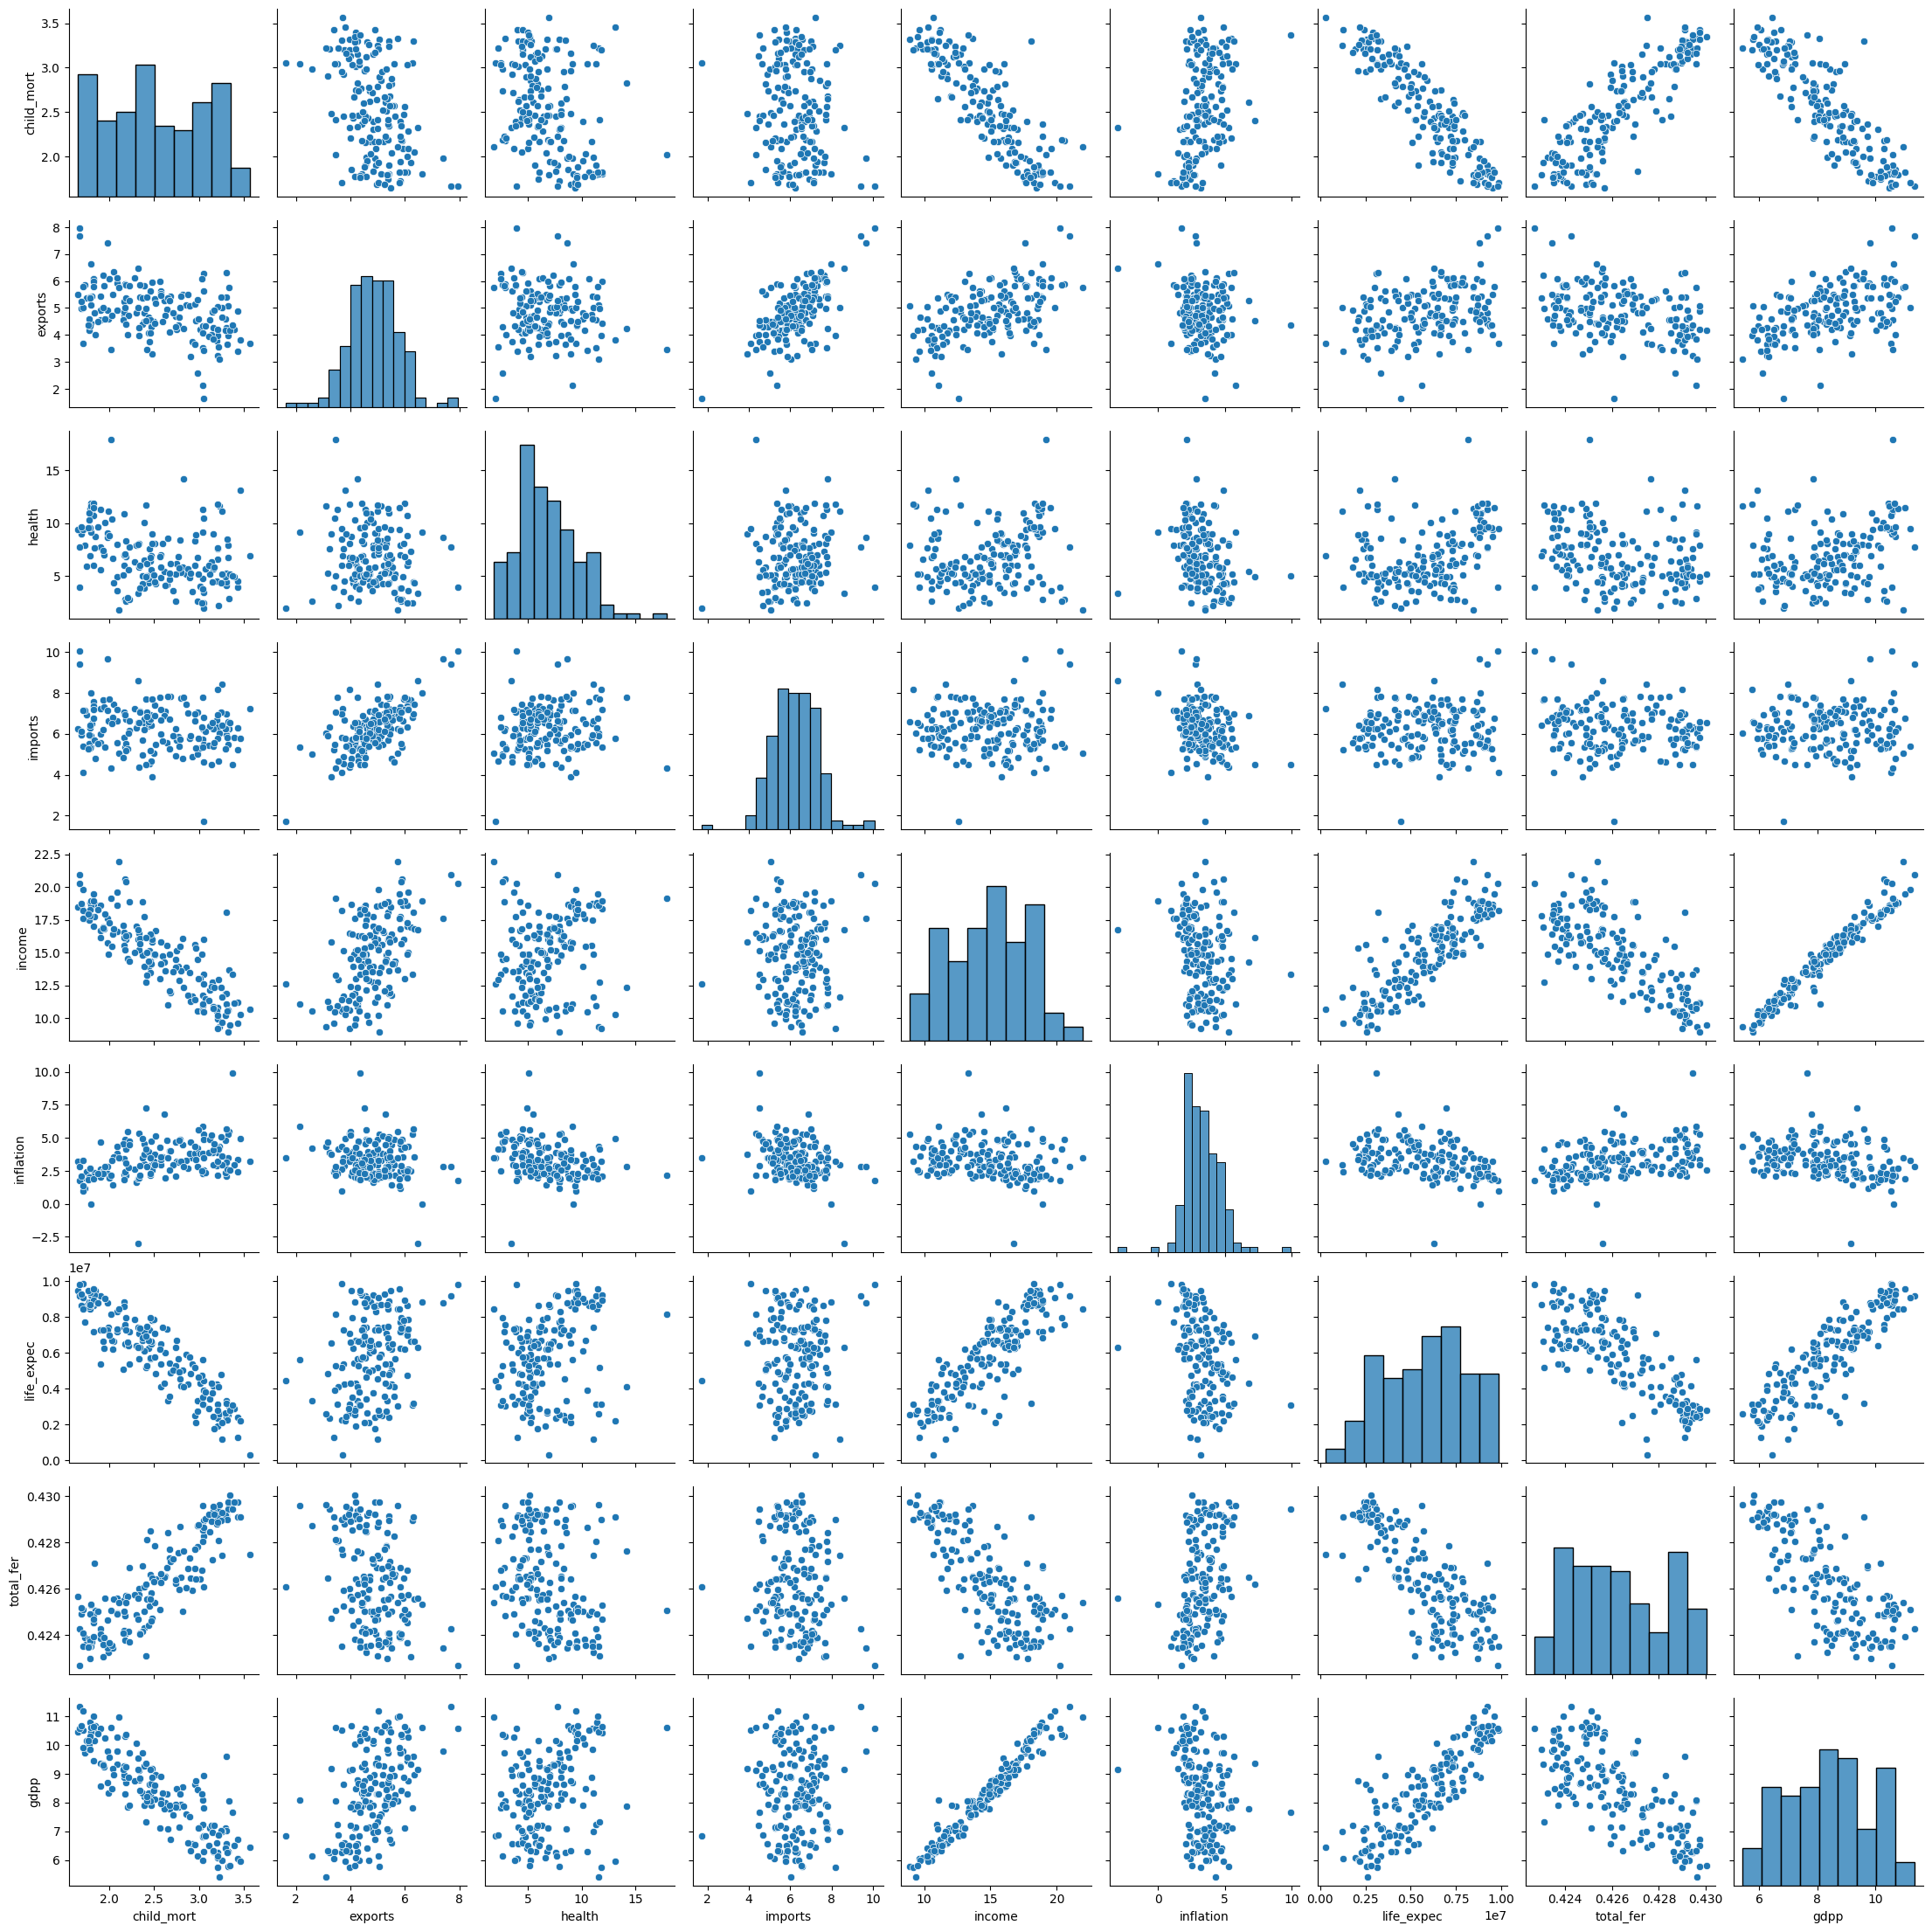

In [31]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('Pairplot - Data BoxCox Transformed')
sns.pairplot(boxcox_data)
plt.show()

In [32]:
def corrmatrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [33]:
print('Correlation Matrix - Data BoxCox Transformed')
corrmatrix(boxcox_data)

Correlation Matrix - Data BoxCox Transformed


child_mort exports health imports    income inflation life_expec  \
child_mort                                   -0.858853            -0.913547   
exports                                                                       
health                                                                        
imports                                                                       
income      -0.858853                                              0.838438   
inflation                                                                     
life_expec  -0.913547                         0.838438                        
total_fer     0.87042                        -0.750676            -0.786441   
gdpp        -0.875005                         0.974396             0.849259   

           total_fer      gdpp  
child_mort   0.87042 -0.875005  
exports                         
health                          
imports                         
income     -0.750676  0.974396  
inflation                       
life_expec -0.786441  0.849259  
total_fer            -0.733234  
gdpp       -0.733234

In [34]:
log_data = df.copy(deep=True)
log_data = transform(log_data, np.log)
log_data.skew()

child_mort    0.241073
exports      -0.358373
health        0.705746
imports      -0.646111
income       -0.234644
inflation    -5.283491
life_expec   -1.579032
total_fer     0.725025
gdpp          0.009090
dtype: float64

In [35]:
sqrt_data = df.copy(deep=True)
sqrt_data = transform(sqrt_data, np.sqrt)
sqrt_data.skew()

child_mort    0.812560
exports       0.966607
health        0.705746
imports       0.725291
income        0.857148
inflation     1.779440
life_expec   -1.232322
total_fer     0.844463
gdpp          1.143604
dtype: float64

In [36]:
comp_matrix = pd.concat([corrmatrix(boxcox_data), corrmatrix(log_data).rename(columns=\
                                                                            {old:str('log-'+old)\
                                                                             for old in corrmatrix(log_data).columns})],\
                        axis=1)

comp_matrix = pd.concat([comp_matrix, corrmatrix(sqrt_data).rename(columns={old:str('sqrt-'+old)\
                                                                             for old in corrmatrix(sqrt_data).columns})],\
                        axis=1)

for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:0 if x == '' else x)

for bc,log,sqrt in zip(comp_matrix.columns[:9],comp_matrix.columns[9:-9],comp_matrix.columns[-9:]):
    comp_matrix[bc] = comp_matrix[[bc,log,sqrt]].apply(lambda x: 'boxcox' if abs(x[0]) > abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) > abs(x[1]) and abs(x[0]) < abs(x[2])\
                                                       else 'log' if abs(x[1]) > abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) > abs(x[0]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[2]) > abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) > abs(x[0]) and abs(x[2]) < abs(x[1])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) > abs(x[1])\
                                                       else 'log' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[0]) < abs(x[1]) and abs(x[0]) < abs(x[2]) and abs(x[1]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) > abs(x[2])\
                                                       else 'sqrt' if abs(x[1]) < abs(x[0]) and abs(x[1]) < abs(x[2]) and abs(x[0]) < abs(x[2])\
                                                       else 'boxcox' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) > abs(x[1])\
                                                       else 'log' if abs(x[2]) < abs(x[0]) and abs(x[2]) < abs(x[1]) and abs(x[0]) < abs(x[1])\
                                                       else '', axis=1)

comp_matrix.drop(comp_matrix.columns[-18:], axis=1, inplace=True)
print('Correlation Cefficient Comparison Matrix:')
comp_matrix

Correlation Cefficient Comparison Matrix:


child_mort exports health imports  income inflation life_expec  \
child_mort                                       log               boxcox   
exports                                                                     
health                                                                      
imports                                                                     
income            log                                              boxcox   
inflation                                                                   
life_expec     boxcox                         boxcox                        
total_fer        sqrt                            log               boxcox   
gdpp           boxcox                         boxcox               boxcox   

           total_fer    gdpp  
child_mort      sqrt  boxcox  
exports                       
health                        
imports                       
income           log  boxcox  
inflation                     
life_expec    boxcox  boxcox  
total_fer                log  
gdpp             log

In [37]:
for c in comp_matrix.columns:
    comp_matrix[c] = comp_matrix[c].apply(lambda x:np.nan if x == '' else x)

boxcox=[]
log=[]
sqrt=[]

for col in comp_matrix.columns:
    try:

        boxcox.append(comp_matrix[col].value_counts().loc['boxcox'])
    except:
        boxcox.append(0)
    try:
        log.append(comp_matrix[col].value_counts().loc['log'])
    except:
        log.append(0)
    try:
        sqrt.append(comp_matrix[col].value_counts().loc['sqrt'])
    except:
        log.append(0)
print('Boxcox Transformation highest correlation coefficients:', int(sum(boxcox)/2))
print('Log Transformation highest correlation coefficient:', int(sum(log)/2))
print('Square Root Transformation highest correlation coefficient:', int(sum(sqrt)/2))

Boxcox Transformation highest correlation coefficients: 6
Log Transformation highest correlation coefficient: 3
Square Root Transformation highest correlation coefficient: 1


###Observations
- Boxcox is the most effective typeof transformation
- All boxcox transformed features are normally distributed.
- The boxcox transformation has the strongest impact in strengthening linear correlations between the features (out of 10 linear correlations coefficients greater than 0.7, 6 are obtained through boxcox transformation, 3 through logarithmic transformation, 1 with square root transformation)
- We shall use boxcox to transform the data distribution closer to Gaussian distribution

In [38]:
cols = []
for i in range(len(df.skew().index)):
    if abs(df.skew()[i]) > 0.75:
        cols.append(df.skew().index[i])

lambda_values = pd.Series(dict(zip(cols, lambda_list)))
print('Lambda values used in BoxCox transformation per data feature:')
lambda_values

Lambda values used in BoxCox transformation per data feature:


child_mort   -0.163454
exports       0.142427
imports       0.232995
income        0.097441
inflation     0.288592
life_expec    3.911049
total_fer    -2.317588
gdpp         -0.003218
dtype: float64

##Feature Scaling

In [39]:
boxcox_data.describe()

child_mort     exports      health     imports      income   inflation  \
count  167.000000  167.000000  167.000000  167.000000  167.000000  167.000000   
mean     2.524776    4.844862    6.815689    6.251297   14.862237    3.291616   
std      0.534895    0.939880    2.746837    1.111199    2.964398    1.373132   
min      1.646846    1.626900    1.810000    1.729543    8.919017   -2.993101   
25%      2.066908    4.265022    4.920000    5.496081   12.376412    2.352180   
50%      2.466485    4.818866    6.320000    6.260140   14.906636    3.190764   
75%      3.035741    5.421425    8.600000    6.975568   17.021319    4.099667   
max      3.569427    7.955873   17.900000   10.066584   21.941206    9.925202   

         life_expec   total_fer        gdpp  
count  1.670000e+02  167.000000  167.000000  
mean   5.851172e+06    0.426303    8.383146  
std    2.293187e+06    0.001998    1.457027  
min    3.229180e+05    0.422675    5.412789  
25%    4.093251e+06    0.424714    7.113307  
50%    6.204560e+06    0.426083    8.333888  
75%    7.449306e+06    0.428090    9.404663  
max    9.850910e+06    0.430040   11.349324

###Observation
- Even after the BoxCox transformation, features are on different scales (in particular life_expec and total_fer). we will scale the data using Z-Score Normalization.

In [40]:
scaled_ds = StandardScaler().fit_transform(boxcox_data)
scaled_ds

array([[ 1.28244392, -1.72835389,  0.27908825, ..., -1.52502272,
         1.564927  , -1.46221156],
       [-0.24719848, -0.37672276, -0.09701618, ...,  0.62105489,
        -0.9957475 , -0.12124937],
       [ 0.21074304,  0.12279285, -0.96607302, ...,  0.65206496,
         0.29520076, -0.0632716 ],
       ...,
       [ 0.0642978 ,  1.22660376,  0.0088773 , ...,  0.15456666,
        -0.6029282 , -0.88423217],
       [ 0.87101873, -0.27085693, -0.59727159, ..., -0.53686048,
         1.2274897 , -0.88423217],
       [ 1.21228386,  0.06210147, -0.33801514, ..., -1.77901603,
         1.45707963, -0.81154276]])

#Model Development

In [41]:
# import the libraries
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##KMeans

In [42]:
def distortion_function(k, dataset, init='k-means++', random_state=98, n_init=10):
    km = KMeans(init=init, n_clusters=k, random_state=random_state, n_init=n_init)
    km.fit(dataset)
    dist_matrix = pd.DataFrame(columns=['Cluster', 'Distance'])
    for x in range(len(dataset)):
        dist_matrix = pd.concat([dist_matrix, pd.DataFrame({'Cluster': [km.labels_[x]],
                                                            'Distance': [((dataset[x] - km.cluster_centers_[km.labels_[x]])**2).sum()]
                                                            })],
                                ignore_index=True)
    distortion = (dist_matrix.groupby(['Cluster']).mean()).mean()[0]
    return distortion

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98, n_init=10)
    km.fit(scaled_ds)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=scaled_ds, n_init=10))
    silhouette.append(silhouette_score(scaled_ds, km.labels_))

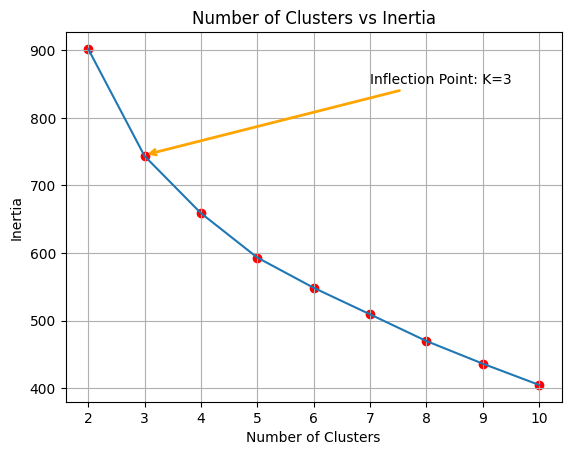

In [43]:

plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3,745),
             xytext=(7,850),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))

plt.show()

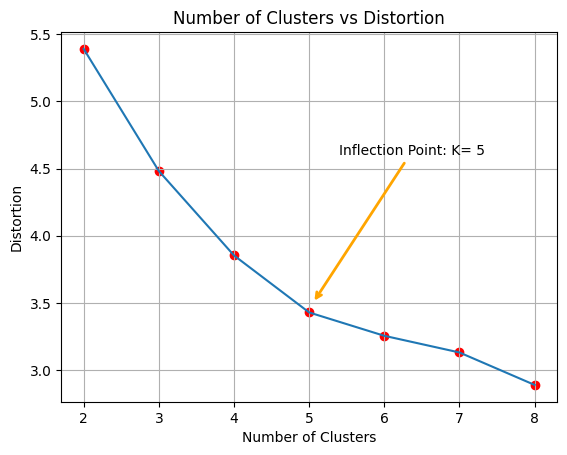

In [44]:
plt.plot(range(2,9), distortion[:7])
plt.scatter(range(2,9),distortion[:7], color='red')
plt.annotate('Inflection Point: K= 5',
             xy=(5.05,3.5),
             xytext=(5.4,4.6),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.title('Number of Clusters vs Distortion')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.grid(True)
plt.show()

In [45]:
def cluster_boxplots(scaled_dataset, original_dataset, k=2, plot_size=(14,11), add_info=''):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(scaled_dataset)
    original_dataset['cluster'] = km.labels_

    fig = plt.figure(figsize=plot_size)
    child_mort = fig.add_subplot(3,3,1) # or fig.add_subplot(xyz)
    exports = fig.add_subplot(3,3,2)
    health = fig.add_subplot(3,3,3)
    imports = fig.add_subplot(3,3,4)
    income = fig.add_subplot(3,3,5)
    inflation = fig.add_subplot(3,3,6)
    life_expec = fig.add_subplot(3,3,7)
    total_fer = fig.add_subplot(3,3,8)
    gdpp = fig.add_subplot(3,3,9)

    #subplot 1
    sns.boxplot(x='cluster', y='child_mort', data=original_dataset, ax=child_mort)
    child_mort.set_xlabel('')

    #subplot 2
    sns.boxplot(x='cluster', y='exports', data=original_dataset, ax=exports)
    exports.set_xlabel('')

    #subplot 3
    sns.boxplot(x='cluster', y='health', data=original_dataset, ax=health)
    health.set_xlabel('')

    #subplot 4
    sns.boxplot(x='cluster', y='imports', data=original_dataset, ax=imports)
    imports.set_xlabel('')

    #subplot 5
    sns.boxplot(x='cluster', y='income', data=original_dataset, ax=income)
    income.set_xlabel('')

    #subplot 6
    sns.boxplot(x='cluster', y='inflation', data=original_dataset, ax=inflation)
    inflation.set_xlabel('')

    #subplot 7
    sns.boxplot(x='cluster', y='life_expec', data=original_dataset, ax=life_expec)
    life_expec.set_xlabel('')

    #subplot 8
    sns.boxplot(x='cluster', y='total_fer', data=original_dataset, ax=total_fer)
    total_fer.set_xlabel('')

    #subplot 9
    sns.boxplot(x='cluster', y='gdpp', data=original_dataset, ax=gdpp)
    gdpp.set_xlabel('')

    fig.suptitle('Clusters by Country Features - No of Cluster: {}{}'.format(k,add_info), fontsize=14)
    plt.tight_layout(pad=2)
    plt.show()

<IPython.core.display.Javascript object>

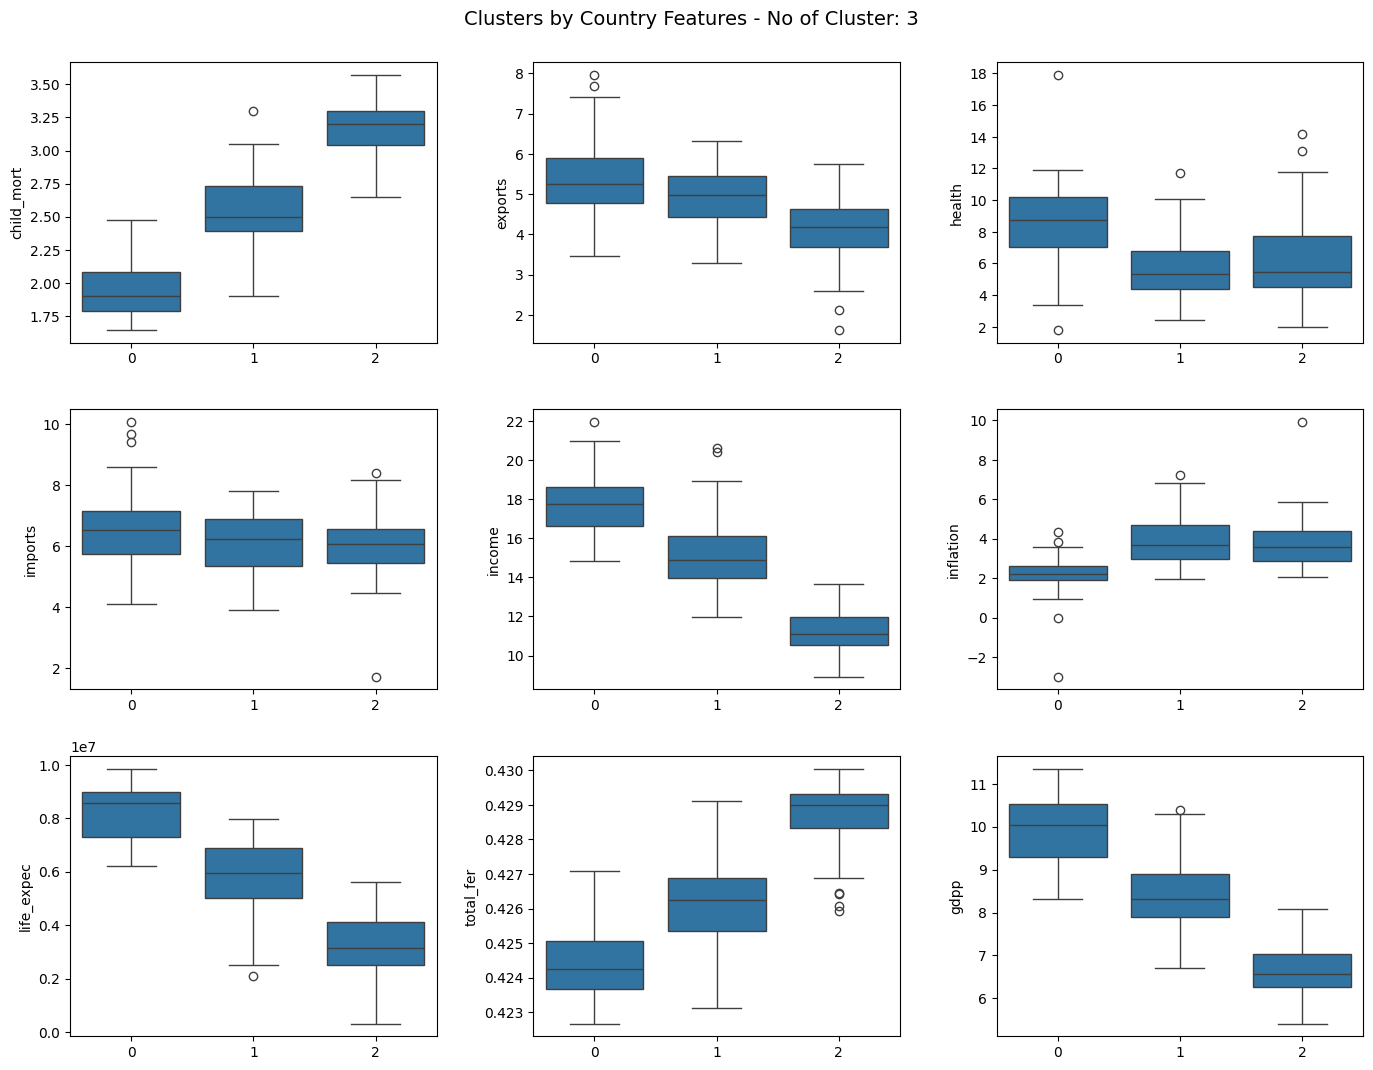

In [46]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(scaled_ds,boxcox_data, k=3)

<IPython.core.display.Javascript object>

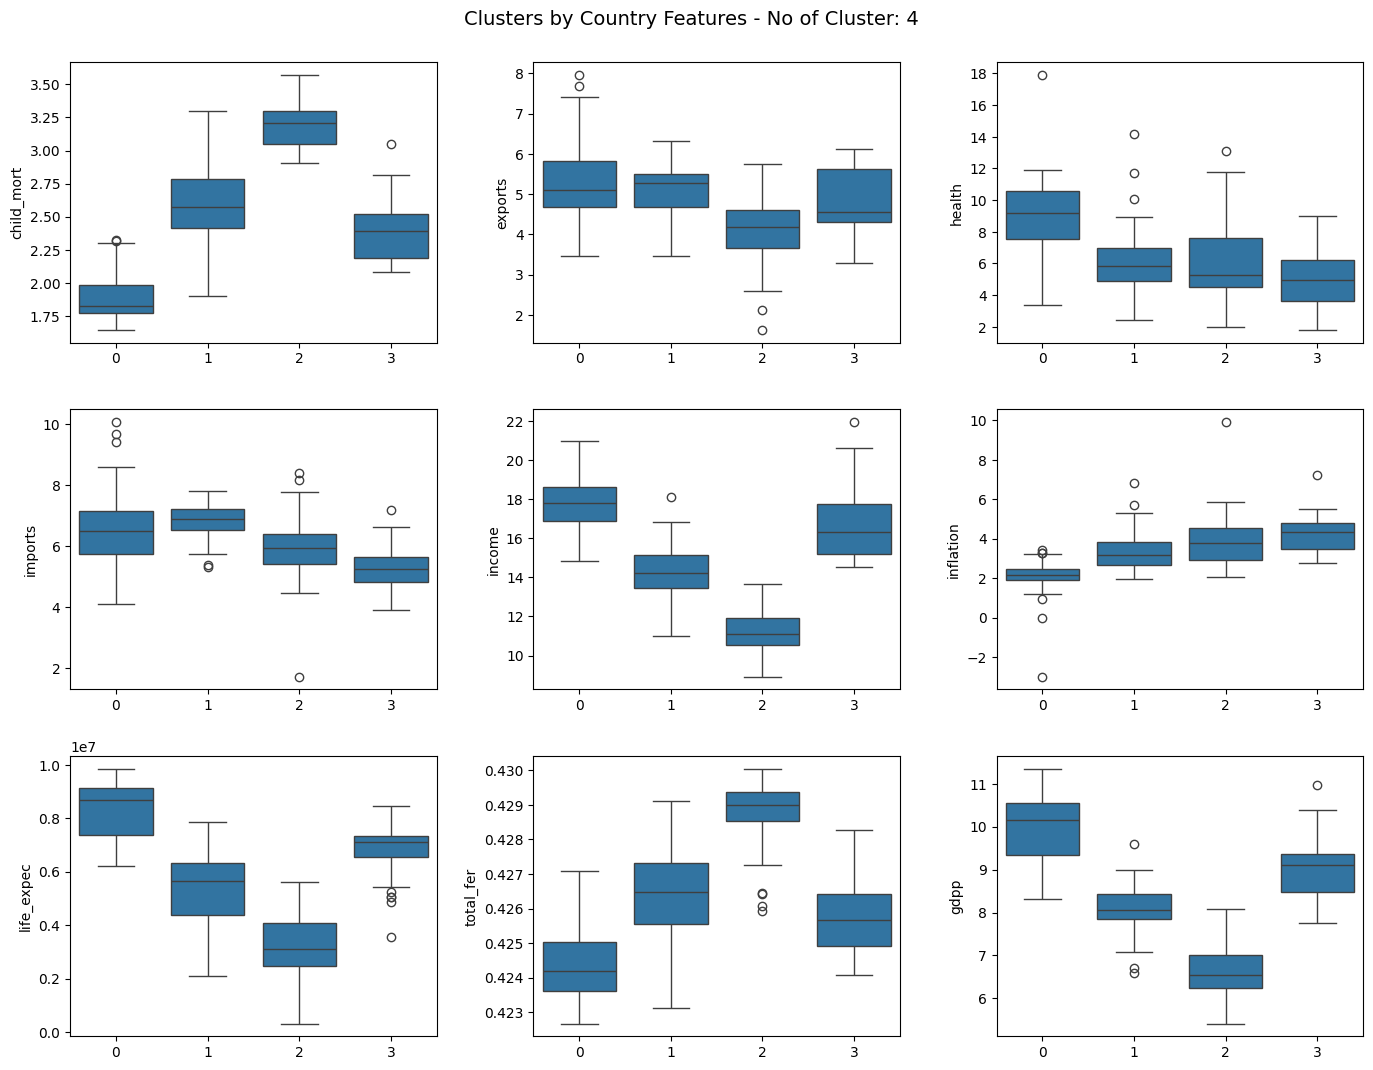

In [47]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(scaled_ds,boxcox_data, k=4)

<IPython.core.display.Javascript object>

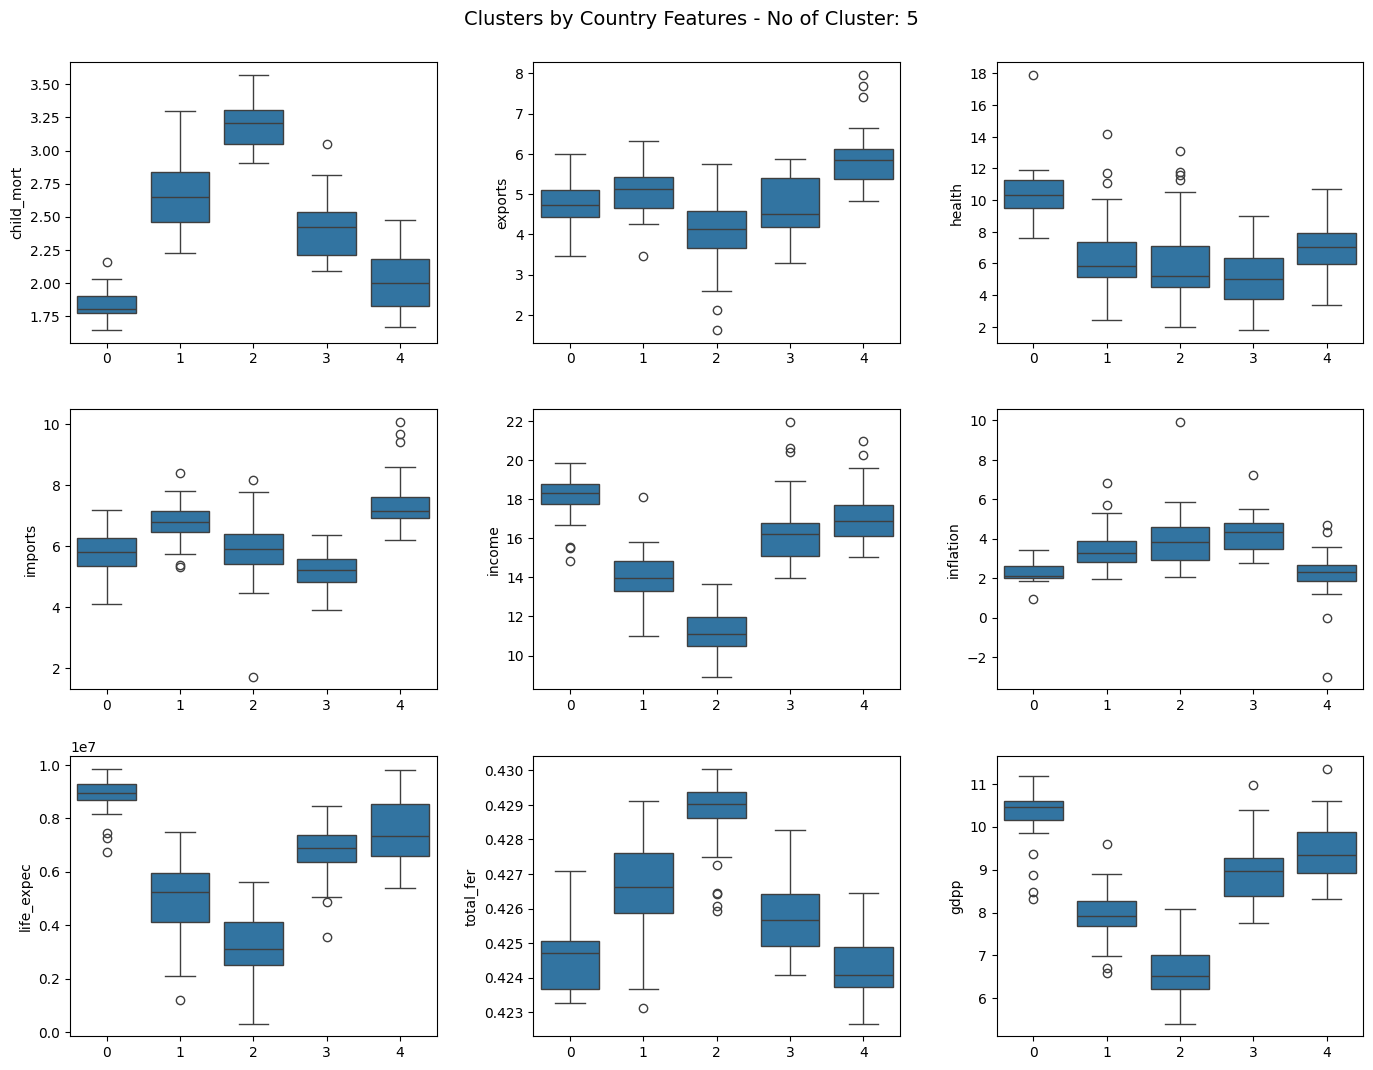

In [48]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(scaled_ds,boxcox_data, k=5)

###Observations

There's clear overlapping between the clusters in following variables:

- imports
- health
- exports
- inflation

which means the above variables are not very significant features for this clustering exercise.

When the number of cluster is 3, we can see (more or less) distinct clusters for all other features (the significant features):

- child_mort
- income
- life_expec
- total_fe
- gdpp

Increasing the number of clusters, doesn't provide any better insights for our data making 3 the obvious choice.


3 is the greatest number of distinct meaningful clusters we can achieve with K-means, using all data features.

<IPython.core.display.Javascript object>

Pairplot - Number of K-Means clusters (using all data features): 3


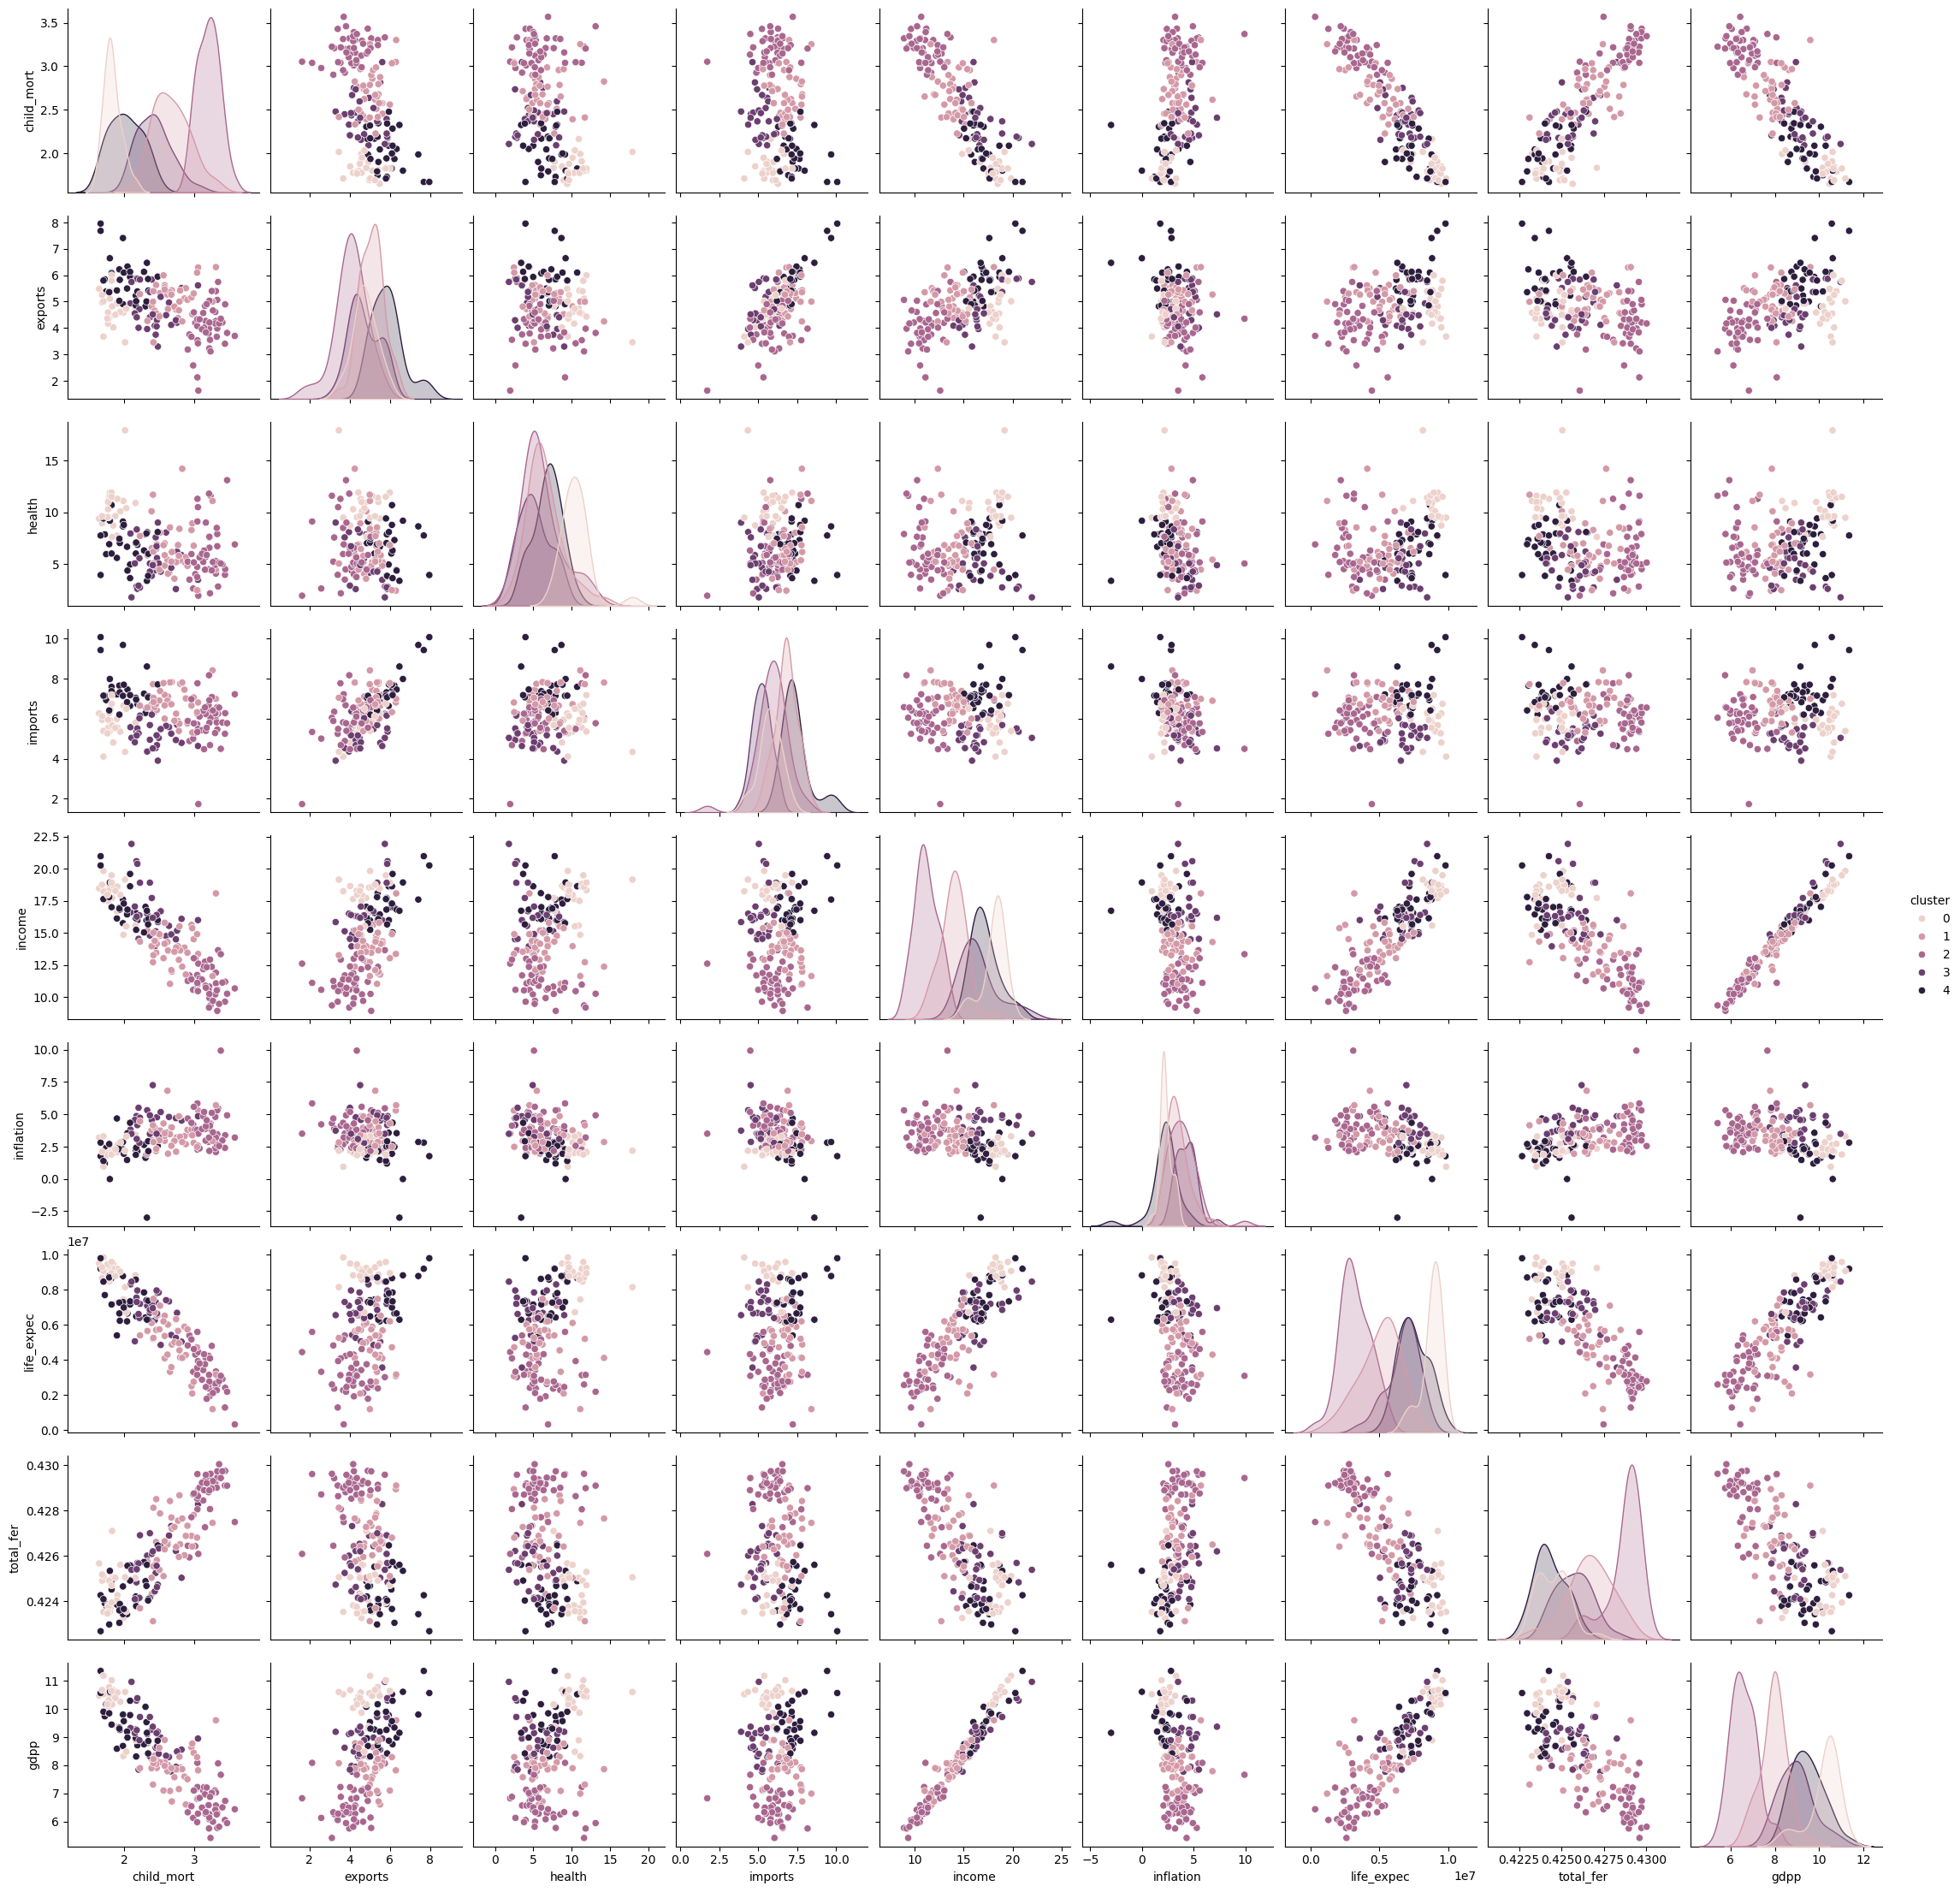

In [49]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
m = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
df['cluster'] = km.labels_
print('Pairplot - Number of K-Means clusters (using all data features): 3')
sns.pairplot(boxcox_data, hue='cluster')
plt.show()

##PCA

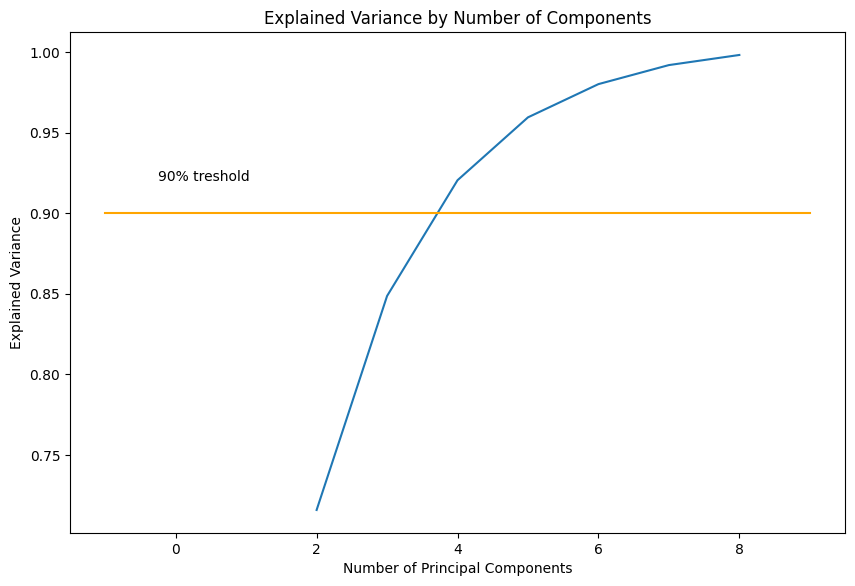

In [50]:
expl_var = {'N_components':[], 'Explained Variance':[]}

for p in range(2,9):
    pca = PCA(n_components=p)
    pca_data = pca.fit_transform(scaled_ds)
    expl_var['N_components'].append(p)
    expl_var['Explained Variance'].append(pca.explained_variance_ratio_.sum())


expl_var = pd.DataFrame(expl_var)
barchart = expl_var.plot(x='N_components', y='Explained Variance', kind='line',figsize=(10,6.5), legend=False)
for i in barchart.patches:
    barchart.annotate(round(i.get_height(),3), # get the frequency of the variable categories
                      xy = (i.get_x() + i.get_width()/2, i.get_height()*1.005), # set the coordinates for each label
                      ha='center', # set the horizontal alignment
                      va='top', # set the vertical alignment
                      xytext=(0,10), # default
                      textcoords='offset points', # default
                      fontsize=10) # set the font size
plt.plot(range(-1,10), np.full((11,), 0.9), color='orange')
plt.text(-0.25, 0.92, '90% treshold')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()

###Observations
- We can reduce the dimensionality to 4 and still retain more than 90% of original variance

In [51]:
pca = PCA(n_components=4)
pca_data = pca.fit_transform(scaled_ds)

inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(pca_data)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=pca_data))
    silhouette.append(silhouette_score(pca_data, km.labels_))

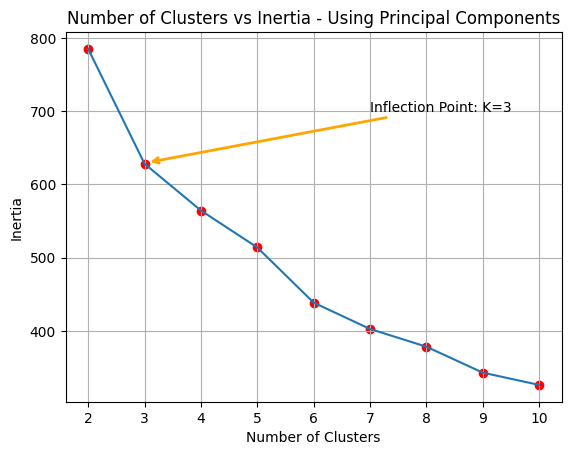

In [52]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='red')
plt.title('Number of Clusters vs Inertia - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.annotate('Inflection Point: K=3',
             xy=(3.05,630),
             xytext=(7,700),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

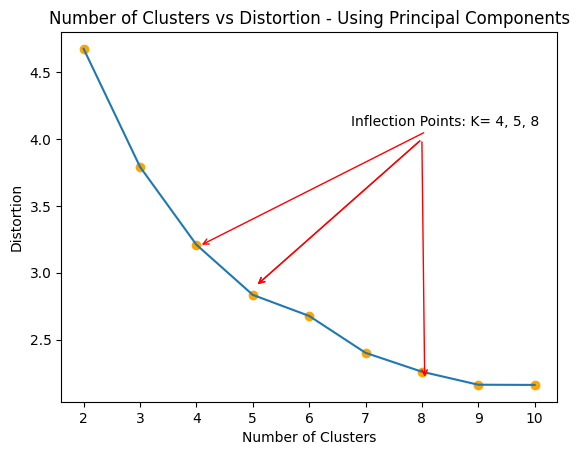

In [53]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='orange')
plt.annotate('Inflection Points: K= 4, 5, 8',
              xy=(4.05,3.2),
              xytext=(6.75,4.1),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.annotate('',
             xy=(5.05,2.9),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.annotate('',
             xy=(8.05,2.2),
             xytext=(8,4),
             arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='red'))
plt.title('Number of Clusters vs Distortion - Using Principal Components')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

plt.show()

<IPython.core.display.Javascript object>

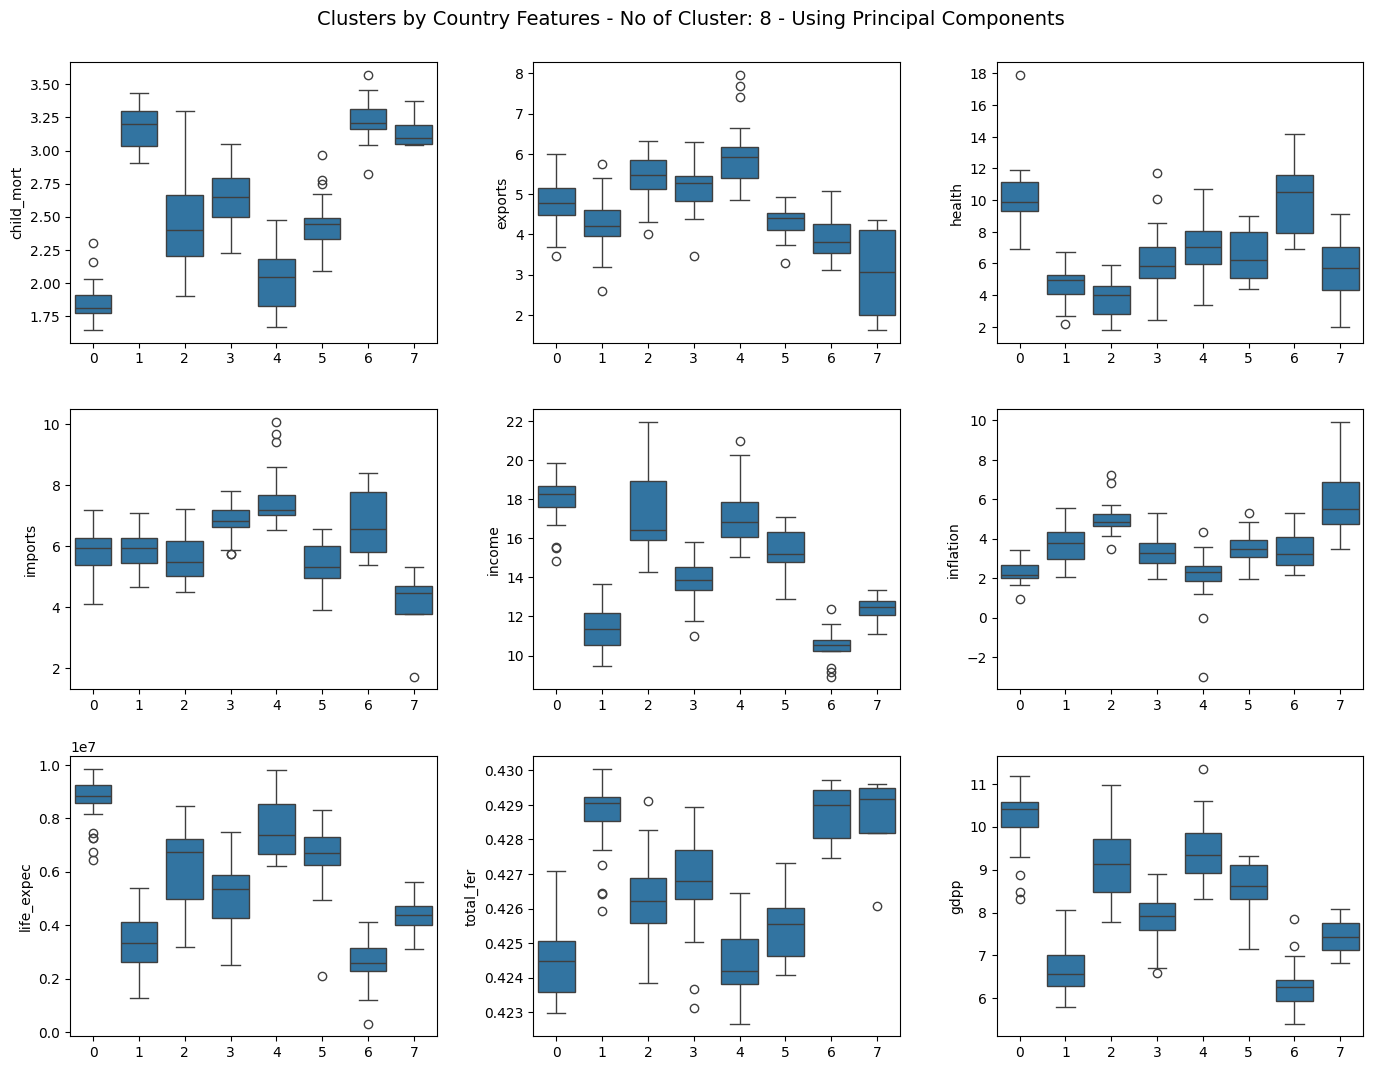

In [54]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(pca_data, boxcox_data, k=8, add_info=' - Using Principal Components')

<IPython.core.display.Javascript object>

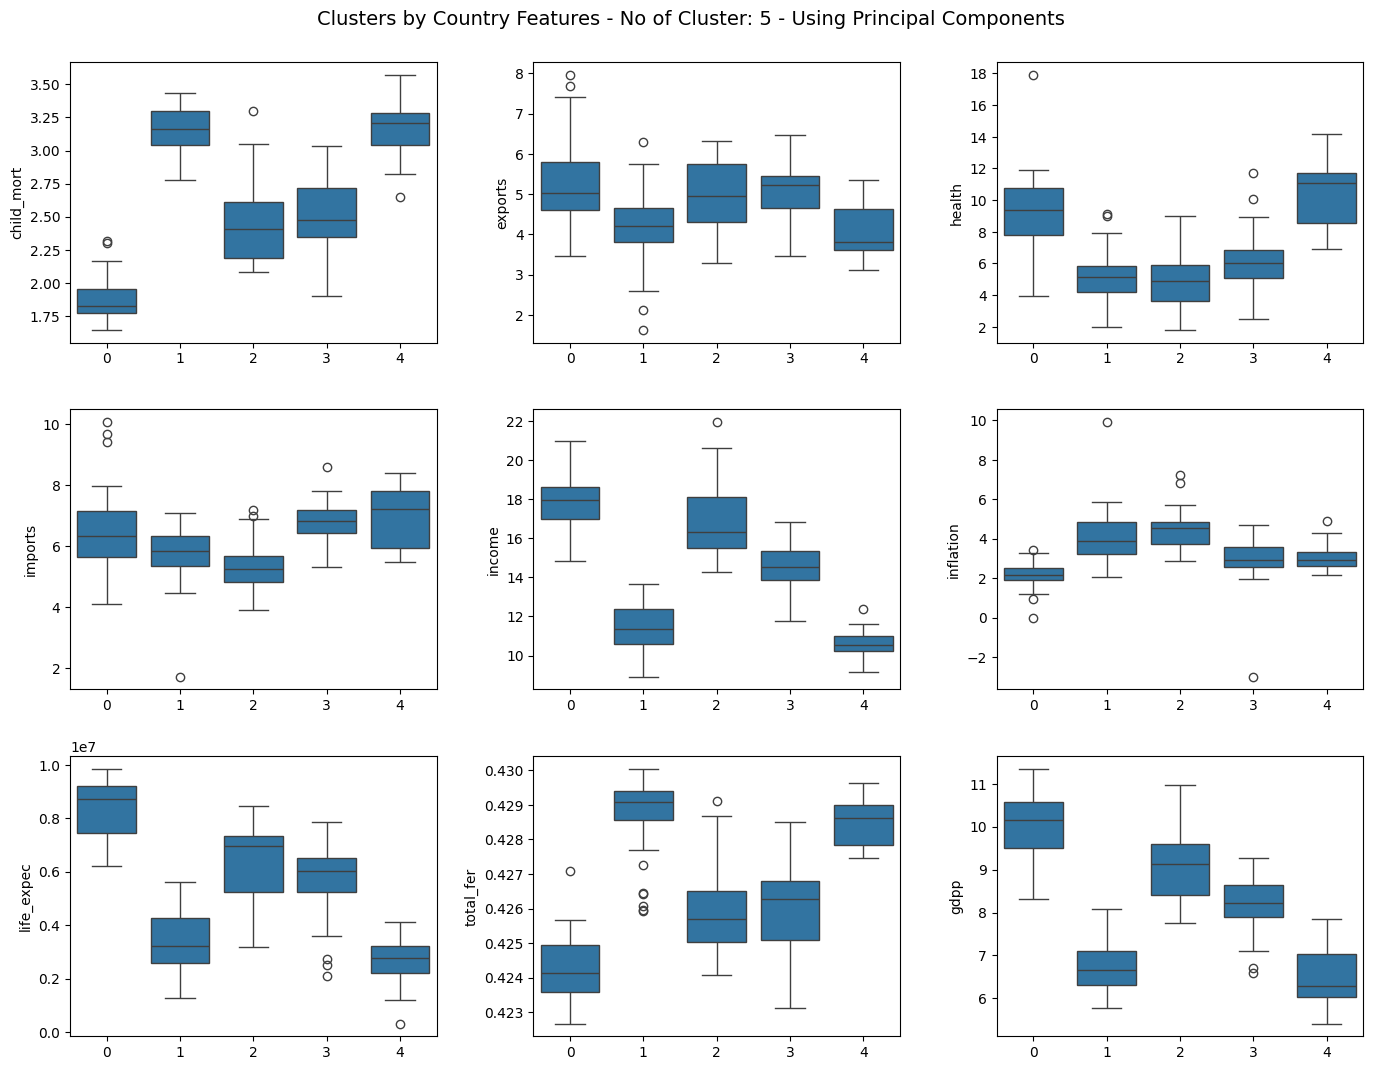

In [55]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(pca_data, boxcox_data, k=5, add_info=' - Using Principal Components')

<IPython.core.display.Javascript object>

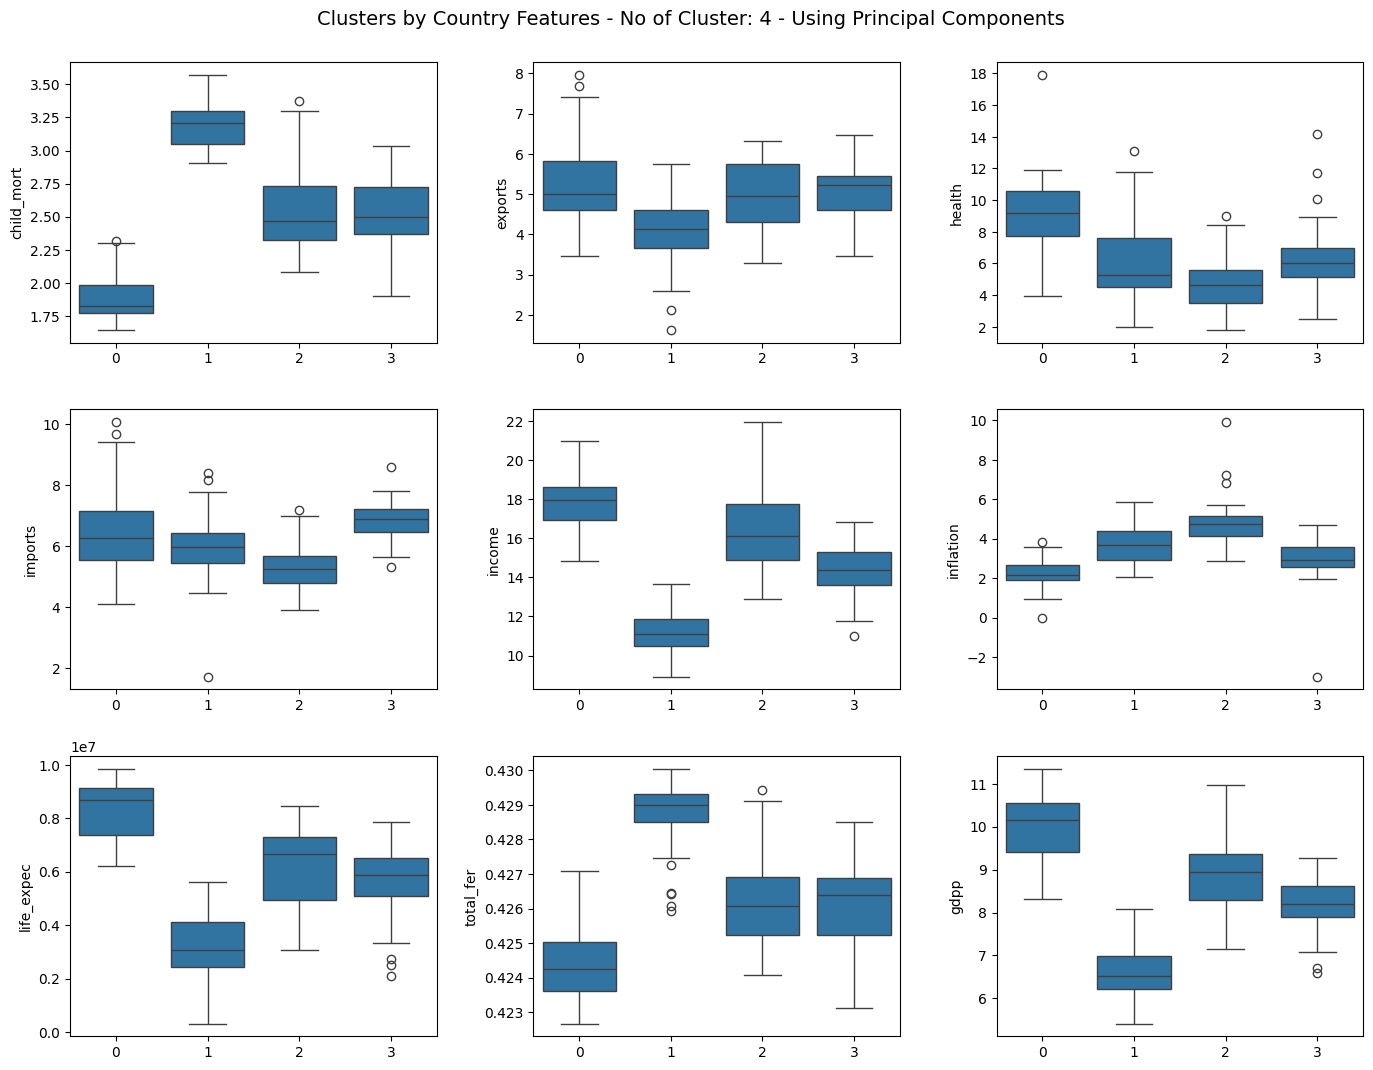

In [56]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(pca_data, boxcox_data, k=4, add_info=' - Using Principal Components')

<IPython.core.display.Javascript object>

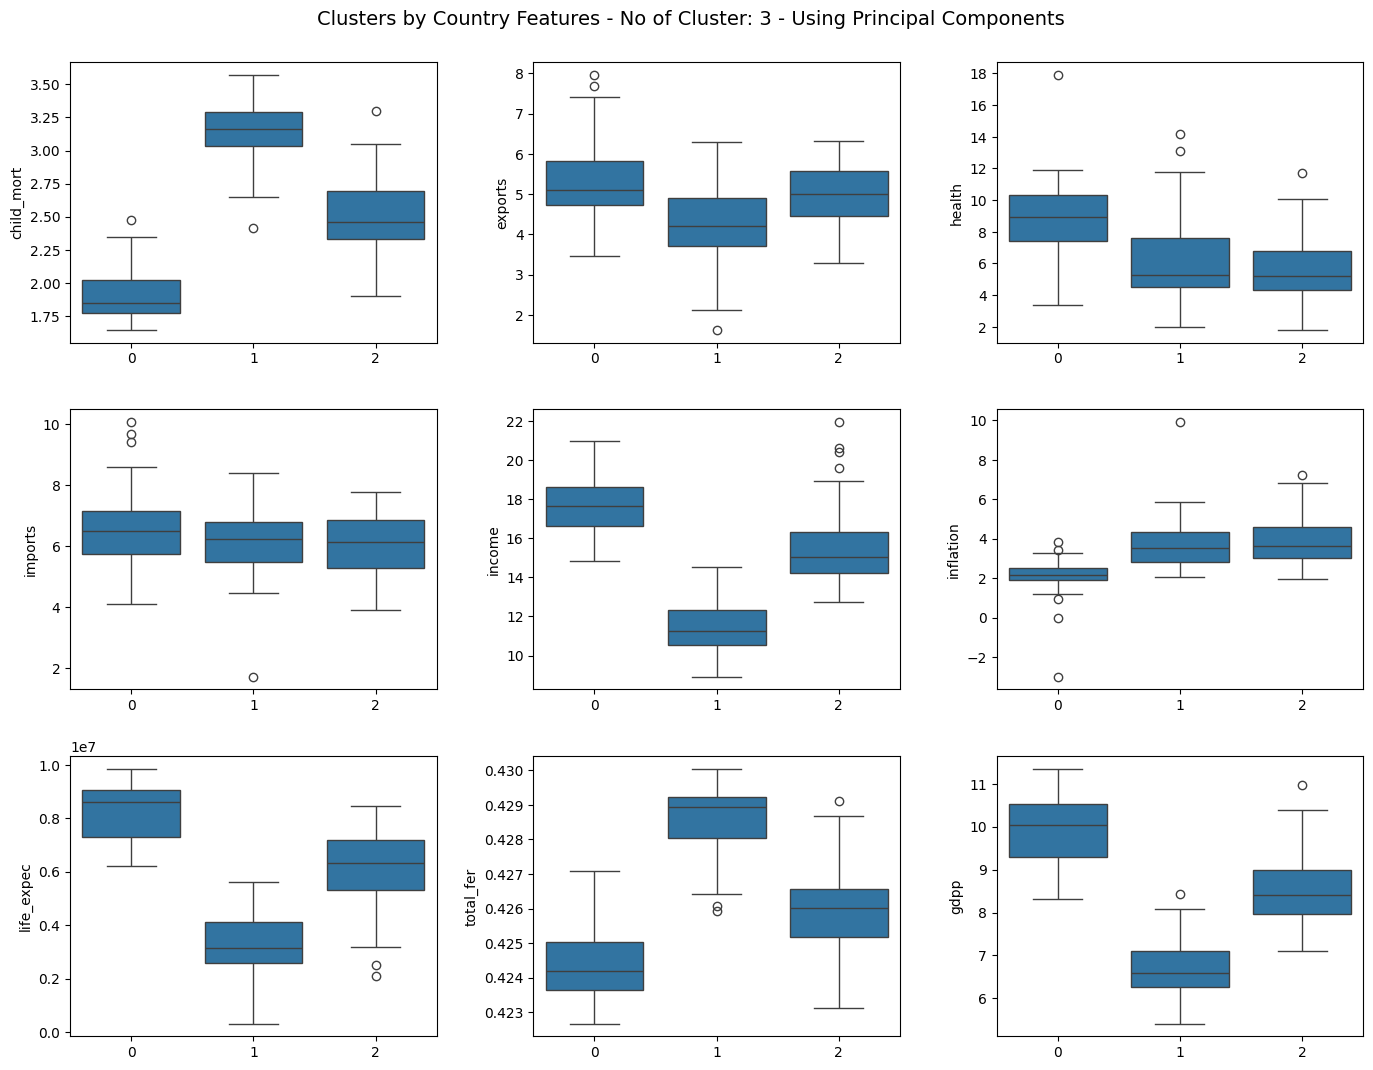

In [57]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
cluster_boxplots(pca_data, boxcox_data, k=3, add_info=' - Using Principal Components')

###Observations
- As per above plots 3 is the best possible value for number of clusters

In [58]:
silhouette={'Dataset':[], 'Silhouette_Score':[]}
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(scaled_ds)
silhouette['Dataset'].append('Original number of features')
silhouette['Silhouette_Score'].append(silhouette_score(scaled_ds, km.labels_))
km.fit(pca_data)
silhouette['Dataset'].append('PCA')
silhouette['Silhouette_Score'].append(silhouette_score(pca_data, km.labels_))
pd.DataFrame(silhouette['Silhouette_Score'], index=silhouette['Dataset'], columns=['Silhouette_Score'])

Silhouette_Score
Original number of features          0.245922
PCA                                  0.279659

In [59]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans_2 = KMeans(n_clusters=num_clusters, max_iter=50,random_state=32)
    kmeans_2.fit(boxcox_data)

    cluster_labels = kmeans_2.labels_

    # silhouette score
    silhouette_avg = silhouette_score(boxcox_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6165073976848785
For n_clusters=3, the silhouette score is 0.5623252033612447
For n_clusters=4, the silhouette score is 0.6106248295996931
For n_clusters=5, the silhouette score is 0.5746920532601498
For n_clusters=6, the silhouette score is 0.5743889508178645
For n_clusters=7, the silhouette score is 0.5938068984924639
For n_clusters=8, the silhouette score is 0.5802166849110832


##Feature selection

Remove features that we discussed earlier that have minimal or no impact - health, imports, exports, inflation

In [60]:
boxcox_data

child_mort   exports  health   imports     income  \
country                                                                  
Afghanistan            3.208692  3.225288    7.58  6.341887  10.816138   
Albania                2.392947  4.491850    6.55  6.523385  14.899242   
Algeria                2.637163  4.959927    4.17  5.574598  15.548799   
Angola                 3.332581  5.744331    2.85  6.239374  13.655327   
Antigua and Barbuda    2.166808  5.225818    6.03  6.981822  16.554713   
...                         ...       ...     ...       ...        ...   
Vanuatu                2.670315  5.264054    5.25  6.713448  12.094787   
Venezuela              2.407374  4.517135    4.91  4.509590  16.175145   
Vietnam                2.559065  5.994266    6.84  7.772154  13.027747   
Yemen                  2.989283  4.591053    5.18  5.762298  13.022692   
Zambia                 3.171276  4.903055    5.89  5.542145  12.326676   

                     inflation    life_expec  total_fer      gdpp  cluster  
country                                                                     
Afghanistan           3.902316  2.364497e+06   0.429421  6.259053        1  
Albania               3.004359  7.271097e+06   0.424320  8.207012        2  
Algeria               4.797498  7.341995e+06   0.426892  8.291234        2  
Angola                5.467484  3.019945e+06   0.429574  8.063779        1  
Antigua and Barbuda   2.246702  7.449306e+06   0.425514  9.268509        0  
...                        ...           ...        ...       ...      ...  
Vanuatu               2.568010  3.588521e+06   0.427690  7.895697        1  
Venezuela             7.257570  6.958340e+06   0.426195  9.366694        2  
Vietnam               4.290725  6.204560e+06   0.425102  7.098659        2  
Yemen                 5.581913  4.623743e+06   0.428749  7.098659        1  
Zambia                4.541314  1.783789e+06   0.429206  7.204252        1  

[167 rows x 10 columns]

In [61]:
slct_ds = boxcox_data.drop(['health', 'imports', 'inflation', 'exports', 'cluster'], axis=1)
slct_ds_scld = StandardScaler().fit_transform(slct_ds)

In [62]:
inertia = []
distortion = []
silhouette = []

for k in range(2,11):
    km = KMeans(init='k-means++', n_clusters=k, random_state=98)
    km.fit(slct_ds_scld)
    inertia.append(km.inertia_)
    distortion.append(distortion_function(k=k, dataset=slct_ds_scld))
    silhouette.append(silhouette_score(slct_ds_scld, km.labels_))

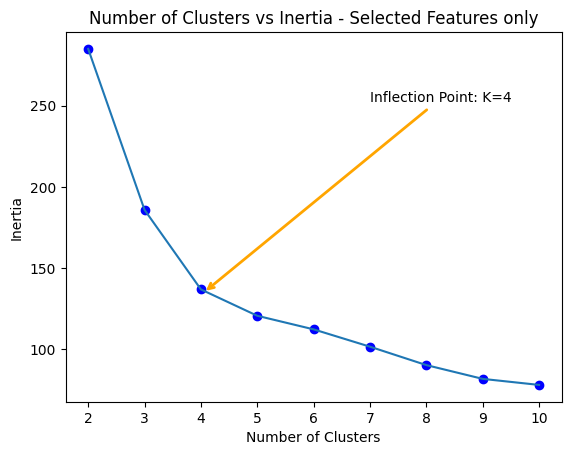

In [63]:
plt.plot(range(2,11), inertia)
plt.scatter(range(2,11),inertia, color='blue')
plt.title('Number of Clusters vs Inertia - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.annotate('Inflection Point: K=4',
              xy=(4.05,135),
              xytext=(7,252),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))
plt.show()

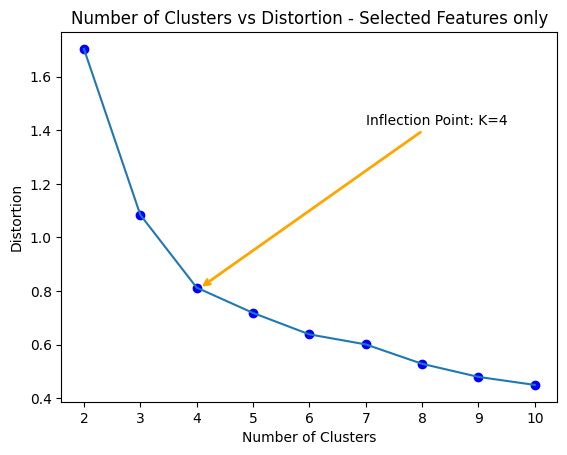

In [64]:
plt.plot(range(2,11), distortion)
plt.scatter(range(2,11),distortion, color='blue')
plt.title('Number of Clusters vs Distortion - Selected Features only')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.annotate('Inflection Point: K=4',
              xy=(4.05,0.81),
              xytext=(7,1.42),
              arrowprops = dict(arrowstyle='->', connectionstyle='arc3', color='orange', lw=2))

plt.show()

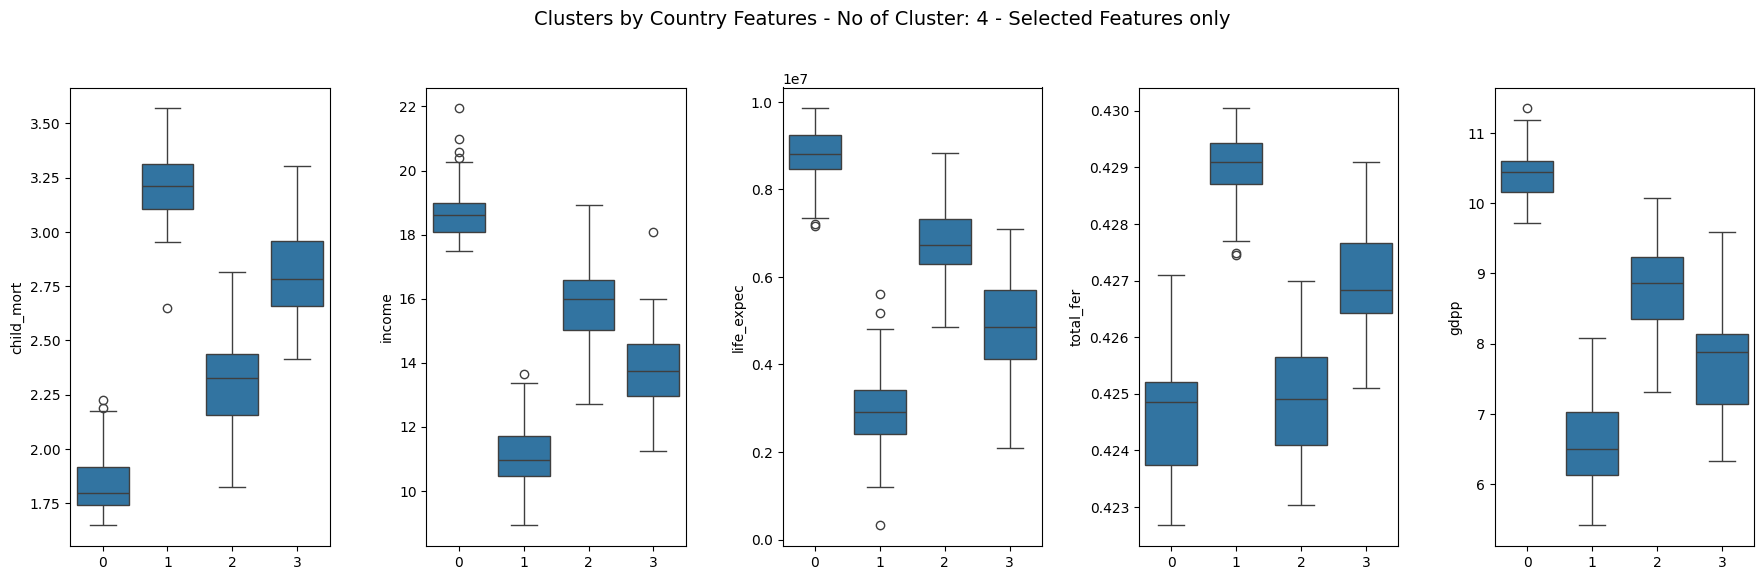

In [65]:
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
slct_ds['cluster'] = km.labels_

fig = plt.figure(figsize=(18,6))
child_mort = fig.add_subplot(1,5,1)
income = fig.add_subplot(1,5,2)
life_expec = fig.add_subplot(1,5,3)
total_fer = fig.add_subplot(1,5,4)
gdpp = fig.add_subplot(1,5,5)

sns.boxplot(x='cluster', y='child_mort', data=slct_ds, ax=child_mort)
child_mort.set_xlabel('')

sns.boxplot(x='cluster', y='income', data=slct_ds, ax=income)
income.set_xlabel('')

sns.boxplot(x='cluster', y='life_expec', data=slct_ds, ax=life_expec)
life_expec.set_xlabel('')

sns.boxplot(x='cluster', y='total_fer', data=slct_ds, ax=total_fer)
total_fer.set_xlabel('')

sns.boxplot(x='cluster', y='gdpp', data=slct_ds, ax=gdpp)
gdpp.set_xlabel('')

fig.suptitle('Clusters by Country Features - No of Cluster: 4 - Selected Features only', fontsize=14)
plt.tight_layout(pad=2)
plt.show()

<IPython.core.display.Javascript object>

Pairplot - Number of Cluster: 4 (Selected Features only)


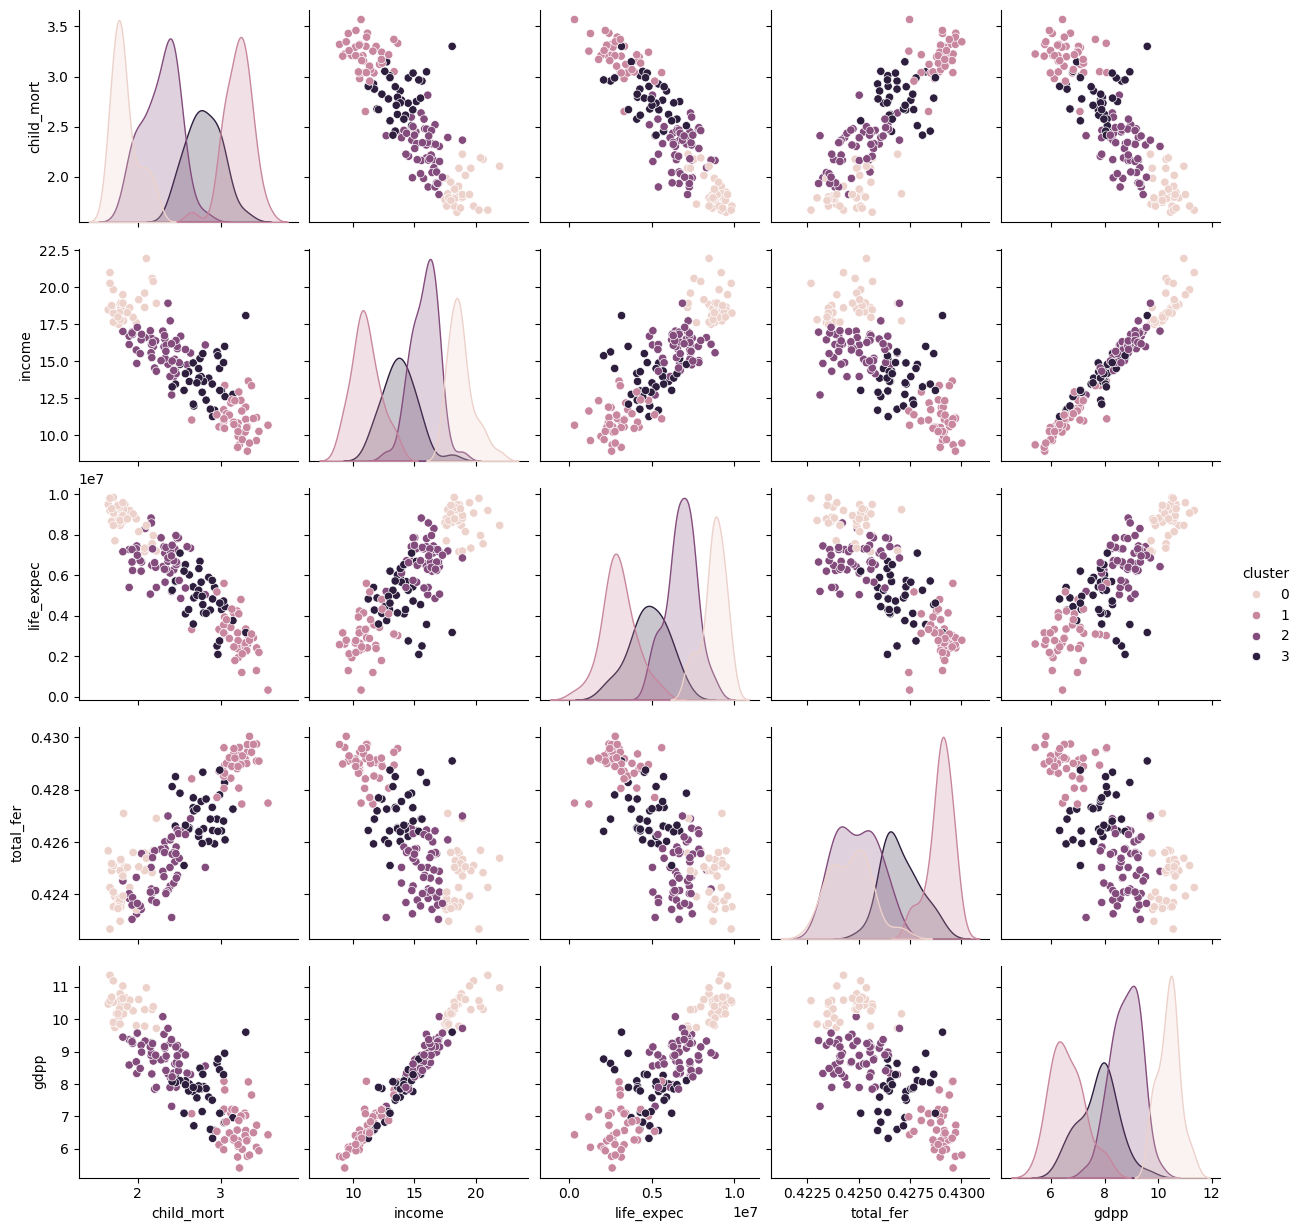

In [66]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
print('Pairplot - Number of Cluster: 4 (Selected Features only)')
sns.pairplot(slct_ds, hue='cluster')
plt.show()

##Hierarchical clustering

###Linkage ward

In [67]:
def plot_dendrogram(model, p=50, dend_title='Hierarchical Clustering Dendrogram', size=(16,6), x_line=0, y_line=0, x_text=0,
                    y_text=0, text=''):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    plt.figure(figsize=(size))
    den = hierarchy.dendrogram(linkage_matrix, orientation='top', p=p, truncate_mode='lastp', show_leaf_counts=True)
    plt.plot(x_line,y_line, color='orange')
    plt.text(x_text, y_text, text)
    plt.title(dend_title)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.ylabel('Distance')
    plt.show()

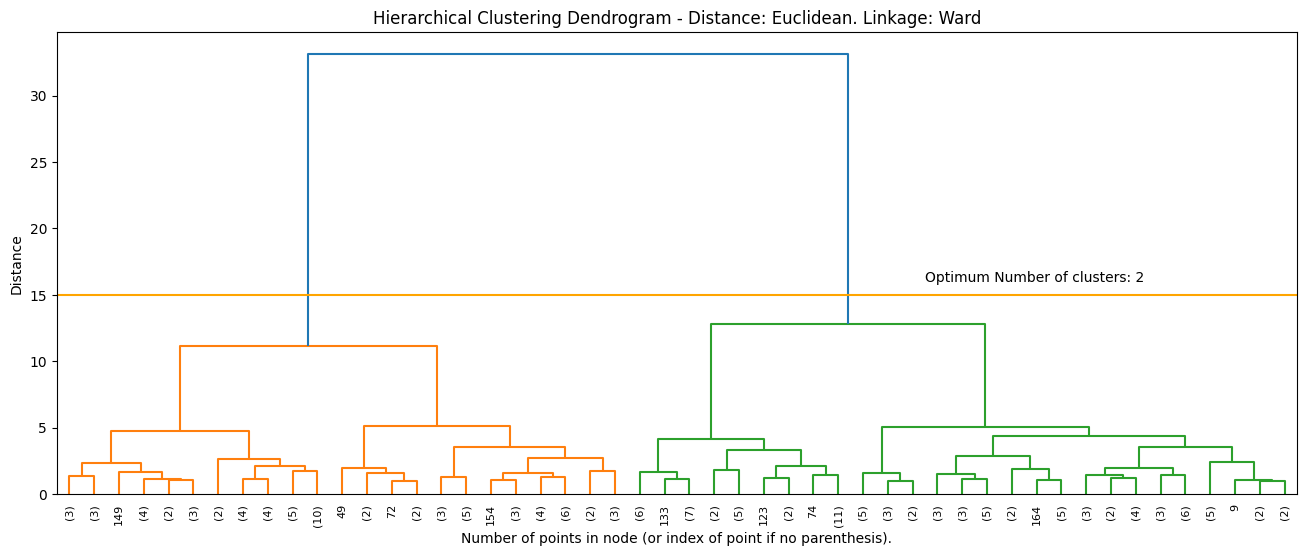

In [68]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='ward')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Ward', x_line=range(600),
                y_line=np.full((600,), 15), x_text=350, y_text=16, text='Optimum Number of clusters: 2')

####Observations
- Optimum number of lcusters is 2
- KMeans performs better than this

###Linkage single

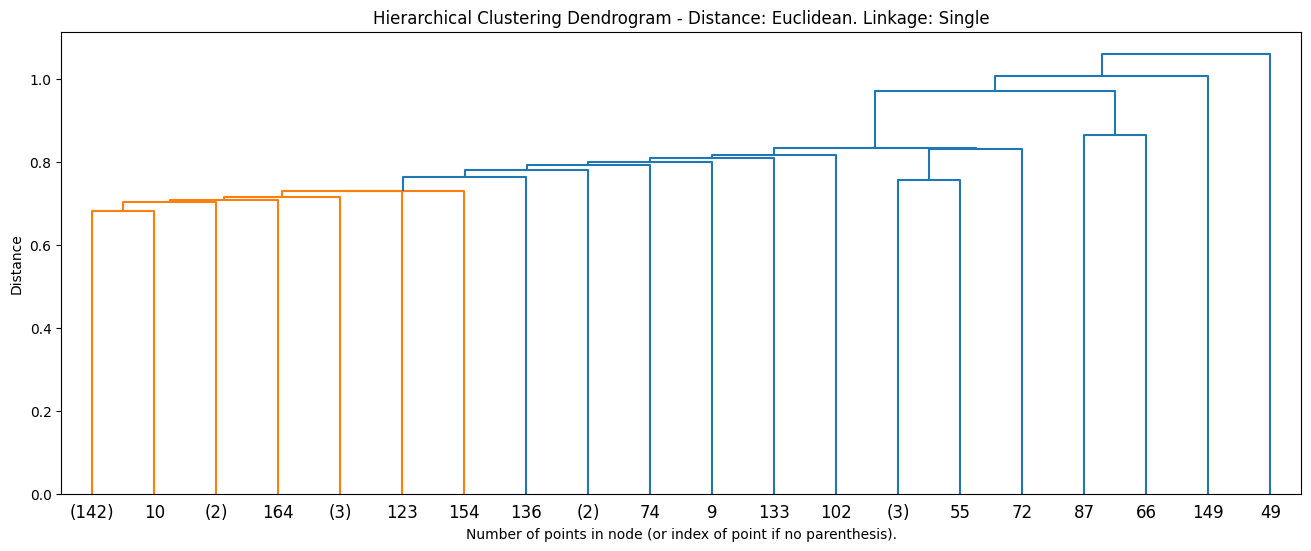

In [69]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='single')
hac.fit(slct_ds_scld)
plot_dendrogram(hac, dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Single', p=20)

####Observations
- Not good at all.
- We have to reject this model

###Linkage complete

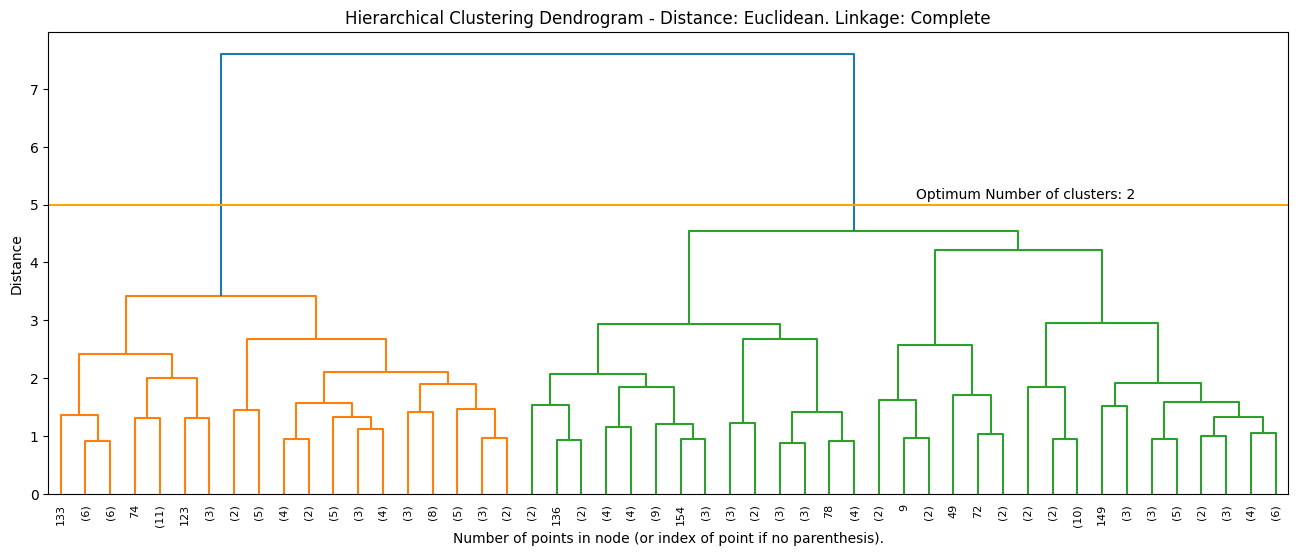

In [70]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='complete')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Complete', x_line=range(600),
                y_line=np.full((600,), 5), x_text=350, y_text=5.1, text='Optimum Number of clusters: 2')

####Observations
- Here again we have 2 as the cluster count

###Linkage average

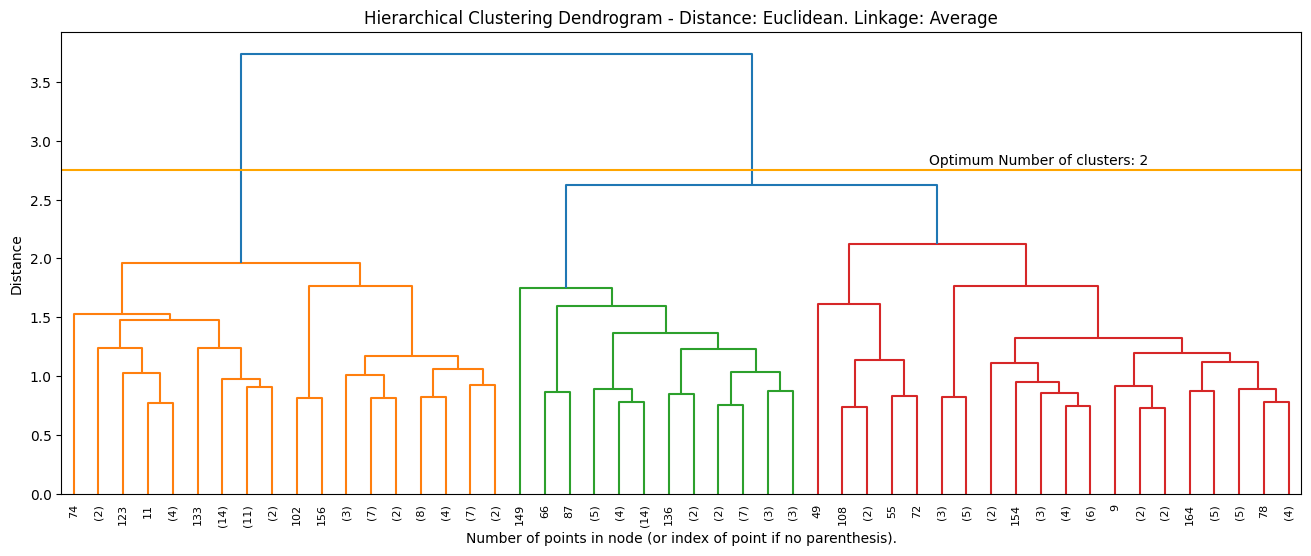

In [71]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='euclidean', linkage='average')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Euclidean. Linkage: Average', p=50,
               x_line=range(600), y_line=np.full((600,), 2.75), x_text=350, y_text=2.8, text='Optimum Number of clusters: 2')


####Observations
- Again the clusters is 2
-Hierarchical clustering withj Euclidean distance does not perform better than KMeans
- Let us try with manhattan distance

###Linkage Single(Manhattan)

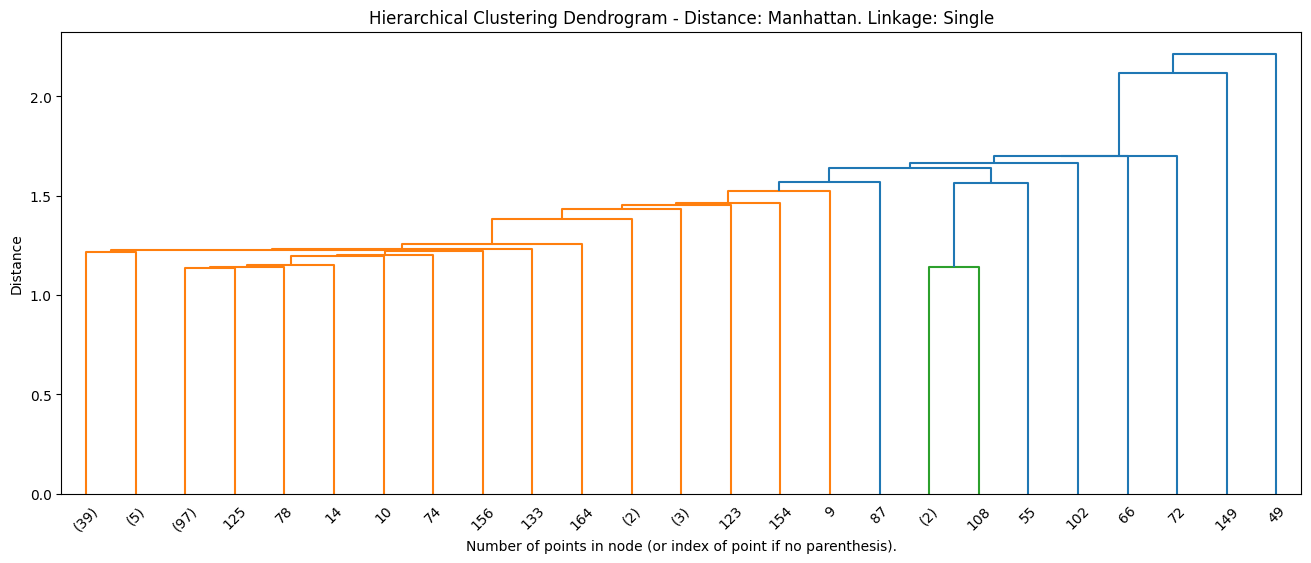

In [72]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='manhattan', linkage='single')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Single', p=25)

###Linkage complete(Manhattan)

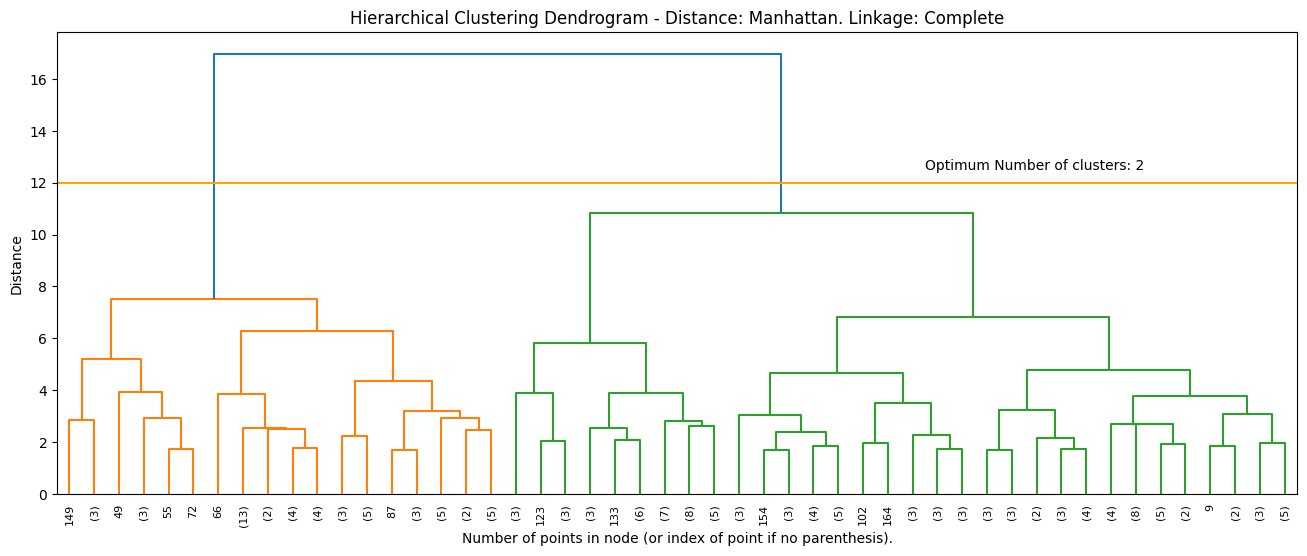

In [73]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='manhattan', linkage='complete')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Complete',\
                x_line=range(600), y_line=np.full((600,), 12), x_text=350, y_text=12.5, text='Optimum Number of clusters: 2')

###Linkage Average(Manhattan)

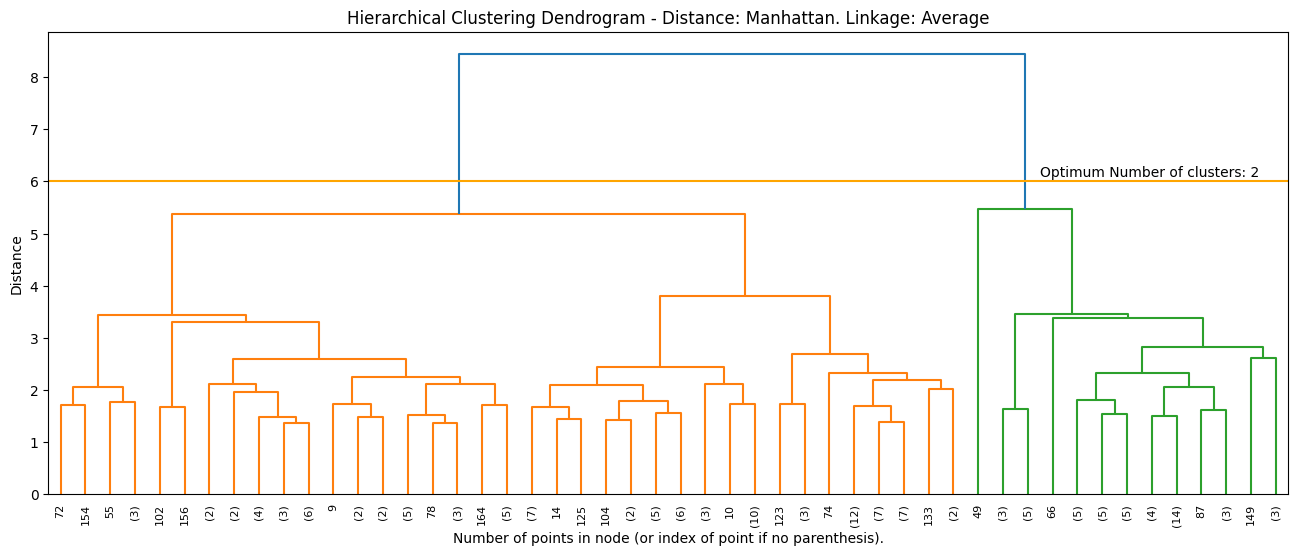

In [74]:
hac = AgglomerativeClustering(n_clusters=None, distance_threshold=0, metric='manhattan', linkage='average')
hac.fit(slct_ds_scld)
plot_dendrogram(hac,dend_title='Hierarchical Clustering Dendrogram - Distance: Manhattan. Linkage: Average',\
                x_line=range(600), y_line=np.full((600,), 6), x_text=400, y_text=6.1, text='Optimum Number of clusters: 2')

####Observations
- Manhattan also performs similar to Euclidean and is not better than Kmeans.

##DBSCAN

In [75]:
radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances:
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(slct_ds_scld)
            #bc_data['cluster'] = dbs.labels_
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(slct_ds_scld, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)

dbscan_perf = pd.DataFrame(dbscan_perf)

In [76]:
np.sort(dbscan_perf['N_Cluster'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [77]:
print("Greatest Silhouette Coeffiecient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coeffiecient per Number of Clusters:


Silhouette_Coefficient
N_Cluster                        
2                        0.479489
3                        0.405192
4                        0.359300
5                        0.270852
6                        0.188485
7                        0.127782
8                        0.029490
9                        0.054372
10                      -0.093637

###Observations
-Let us check the Silhoutte coefficient for kmeans for clusters=2,3,4

In [78]:
km = KMeans(init='k-means++', n_clusters=4, random_state=98)
km.fit(slct_ds_scld)
print('K-Means Silhouette Score (4 clusters):', silhouette_score(slct_ds_scld, km.labels_))

km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(slct_ds_scld)
print('K-Means Silhouette Score (3 clusters):', silhouette_score(slct_ds_scld, km.labels_))

km = KMeans(init='k-means++', n_clusters=2, random_state=98)
km.fit(slct_ds_scld)
print('K-Means Silhouette Score (2 clusters):', silhouette_score(slct_ds_scld, km.labels_))

K-Means Silhouette Score (4 clusters): 0.3870893715253182
K-Means Silhouette Score (3 clusters): 0.4224716584835207
K-Means Silhouette Score (2 clusters): 0.5252195556814028


##Observations
- Kmeans outperforms DBSCAN for 2,3 and 4

###Code

In [79]:
dbscan_perf[dbscan_perf['N_Cluster'] == 2].sort_values('Silhouette_Coefficient', ascending=False).head(1)


Distance  Radius  Min_Points  N_Cluster  Silhouette_Coefficient
13719  manhattan     3.2          60          2                0.479489

In [80]:
dbs = DBSCAN(eps=3.2, min_samples=60, metric='manhattan')
dbs.fit(slct_ds_scld)
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0]), array([ 47, 120]))

In [81]:
dbscan_perf[dbscan_perf['N_Cluster'] == 3].sort_values('Silhouette_Coefficient', ascending=False).head(1)


Distance  Radius  Min_Points  N_Cluster  Silhouette_Coefficient
12970  manhattan    2.55          39          3                0.405192

In [82]:
dbs = DBSCAN(eps=2.55, min_samples=39, metric='manhattan')
dbs.fit(slct_ds_scld)
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0,  1]), array([  4, 119,  44]))

##Observations
- We can conclude that KMeans is better than DBSCAN and PCA
- 3 clusters are supposed to be used for KMeans

##Final Model - KMeans with 3 clusters

In [83]:
km = KMeans(init='k-means++', n_clusters=3, random_state=98)
km.fit(slct_ds_scld)
km_cluster = pd.DataFrame(slct_ds_scld, index=slct_ds.index, columns=slct_ds.drop('cluster',axis=1).columns)
km_cluster['cluster'] = km.labels_
km_cluster.tail()

child_mort    income  life_expec  total_fer      gdpp  cluster
country                                                                  
Vanuatu      0.272908 -0.936370   -0.989652   0.695901 -0.335557        1
Venezuela   -0.220145  0.444224    0.484259  -0.054573  0.677068        2
Vietnam      0.064298 -0.620702    0.154567  -0.602928 -0.884232        2
Yemen        0.871019 -0.622412   -0.536860   1.227490 -0.884232        1
Zambia       1.212284 -0.857910   -1.779016   1.457080 -0.811543        1

In [84]:
cluster_size = km_cluster.groupby(['cluster'], as_index=False)['cluster'].count()
cluster_size.rename(columns={'cluster':'size'}, inplace=True)
cluster_size['cluster'] = [0,1,2]
cluster_size

size  cluster
0    47        0
1    52        1
2    68        2

In [85]:
cluster_magnitude = {'Cluster':[], 'Magnitude':[]}
for c in range(len(km.cluster_centers_)):
    cluster_magnitude['Cluster'].append(c)
    cluster_magnitude['Magnitude'].append(np.sqrt(((km_cluster[km_cluster['cluster']==c].iloc[:,:-1]\
                                                    - km.cluster_centers_[c])**2).sum(axis=1).sum()))

cluster_magnitude = pd.DataFrame(cluster_magnitude)
cluster_magnitude

Cluster  Magnitude
0        0   6.356158
1        1   7.212425
2        2   9.664145

In [86]:
cluster_metric = pd.concat([cluster_magnitude, cluster_size['size']], axis=1)
cluster_metric

Cluster  Magnitude  size
0        0   6.356158    47
1        1   7.212425    52
2        2   9.664145    68

In [87]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
km_cluster[km_cluster['cluster']==0]

<IPython.core.display.Javascript object>

child_mort    income  life_expec  total_fer      gdpp  \
country                                                                       
Australia              -1.271310  1.282947    1.596555  -0.627154  1.574039   
Austria                -1.346392  1.323602    1.320841  -1.313031  1.506693   
Bahamas                -0.414138  0.734472    0.251941  -0.714043  1.163446   
Bahrain                -0.823687  1.276016    0.574958  -0.363555  0.962180   
Belgium                -1.315758  1.276016    1.232038  -0.714043  1.470267   
Brunei                 -0.654684  1.939111    0.746446  -0.739484  1.317684   
Canada                 -1.160730  1.266704    1.466135  -1.024345  1.513744   
Chile                  -0.814083  0.586438    1.076015  -0.688880  0.646723   
Costa Rica             -0.679622  0.238871    1.302958  -0.639366  0.344078   
Croatia                -1.173968  0.617873    0.621055  -1.142052  0.677068   
Cyprus                 -1.460600  1.094267    1.214460  -1.345315  1.226911   
Czech Republic         -1.495433  0.926954    0.810504  -1.202966  0.932547   
Denmark                -1.377875  1.341182    1.144756  -0.701427  1.647891   
Estonia                -1.315758  0.726583    0.574958  -0.898160  0.729343   
Finland                -1.568406  1.245447    1.232038  -0.701427  1.496694   
France                 -1.362024  1.173869    1.484577  -0.508583  1.410758   
Germany                -1.362024  1.259666    1.249676  -1.394461  1.430133   
Greece                 -1.410252  0.939854    1.302958  -1.249586  1.136753   
Hungary                -1.109307  0.710615    0.351892  -1.635800  0.656992   
Iceland                -1.646249  1.221313    1.596555  -0.320880  1.431723   
Ireland                -1.362024  1.377601    1.302958  -0.485618  1.531733   
Israel                 -1.300747  0.968298    1.484577   0.397157  1.222574   
Italy                  -1.393948  1.155832    1.540281  -1.281123  1.327044   
Japan                  -1.531347  1.145384    1.749429  -1.394461  1.471763   
Kuwait                 -0.630331  1.868805    0.924823  -0.310349  1.375425   
Latvia                 -0.903803  0.534908    0.154567  -1.444488  0.558309   
Lebanon                -0.671243  0.433603    1.196944  -1.053269  0.395813   
Lithuania              -1.096817  0.661109    0.168321  -1.218416  0.598442   
Luxembourg             -1.606682  2.071188    1.466135  -1.024345  2.041897   
Malta                  -1.013154  0.926954    1.285136  -1.444488  0.974938   
Netherlands            -1.315758  1.373381    1.356793  -0.804321  1.553224   
New Zealand            -1.084467  1.049175    1.392991  -0.352803  1.286812   
Norway                 -1.531347  1.680394    1.411184  -0.602928  1.923213   
Oman                   -0.560539  1.369143    0.590268   0.302705  0.915495   
Poland                 -1.109307  0.690287    0.621055  -1.361600  0.631015   
Portugal               -1.410252  0.890609    1.196944  -1.394461  1.017755   
Qatar                  -0.785782  2.395177    1.144756  -0.462896  1.775649   
Singapore              -1.606682  1.826358    1.730094  -1.821164  1.502426   
Slovak Republic        -0.990382  0.820988    0.499238  -1.329125  0.814994   
Slovenia               -1.531347  0.939854    1.144756  -1.112118  1.043891   
South Korea            -1.377875  0.992933    1.249676  -1.671971  1.005800   
Spain                  -1.426790  1.054921    1.577734  -1.427713  1.224746   
Sweden                 -1.568406  1.316933    1.503082  -0.567074  1.576596   
Switzerland            -1.315758  1.566382    1.634389  -1.187605  1.815071   
United Arab Emirates   -0.823687  1.602878    0.652065  -0.701427  1.312004   
United Kingdom         -1.214653  1.155832    1.285136  -0.639366  1.382302   
United States          -0.957096  1.452818    1.008228  -0.627154  1.527625   

                      cluster  
country                        
Australia                   0  
Austria                     0  
Bahamas               

In [88]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
km_cluster[km_cluster['cluster']==1]

<IPython.core.display.Javascript object>

child_mort    income  life_expec  total_fer  \
country                                                                 
Afghanistan                 1.282444 -1.369003   -1.525023   1.564927   
Angola                      1.514755 -0.408359   -1.238339   1.641868   
Bangladesh                  0.753764 -1.074777   -0.197680  -0.188105   
Benin                       1.457127 -1.283501   -1.096437   1.445980   
Burkina Faso                1.493668 -1.450696   -1.406454   1.576784   
Burundi                     1.313900 -1.866804   -1.420903   1.662938   
Cambodia                    0.657233 -1.051435   -0.686944   0.287661   
Cameroon                    1.434305 -1.012149   -1.449398   1.372984   
Central African Republic    1.697519 -1.769362   -1.996259   1.402955   
Chad                        1.702876 -1.242204   -1.504791   1.727949   
Comoros                     1.263318 -1.460337   -0.707687   1.255718   
Congo, Dem. Rep.            1.493668 -2.010895   -1.435218   1.718522   
Congo, Rep.                 0.983383 -0.508762   -1.214076   1.322751   
Cote d'Ivoire               1.457127 -1.003973   -1.518311   1.420436   
Eritrea                     0.853400 -1.455501   -1.105084   1.205759   
Gambia                      1.182767 -1.347772   -0.748659   1.538139   
Ghana                       1.120166 -0.909375   -1.061463   1.072796   
Guinea                      1.441990 -1.575388   -1.399178   1.440373   
Guinea-Bissau               1.479268 -1.470102   -1.564618   1.354484   
Haiti                       1.958876 -1.417882   -2.417981   0.594945   
India                       0.909712 -0.634482   -0.676507   0.061373   
Kenya                       0.959560 -1.063021   -1.007840   1.113723   
Kiribati                    0.966640 -1.318996   -1.189483   0.877086   
Kyrgyz Republic             0.285471 -0.977302   -0.424304   0.445727   
Lao                         1.167579 -0.712651   -0.915309   0.479487   
Lesotho                     1.367269 -1.092740   -2.037654   0.576337   
Liberia                     1.273896 -1.922798   -1.181212   1.345084   
Madagascar                  0.959560 -1.470102   -1.181212   1.202089   
Malawi                      1.285272 -1.671785   -1.717580   1.431888   
Mali                        1.629876 -1.264459   -1.285886   1.720419   
Mauritania                  1.347585 -0.848889   -0.458548   1.332391   
Micronesia, Fed. Sts.       0.562203 -0.844415   -0.758796   0.672812   
Mozambique                  1.378172 -1.747634   -1.634267   1.499981   
Myanmar                     0.990259 -0.763698   -0.612979  -0.110655   
Namibia                     0.866251 -0.119293   -1.354802   0.751917   
Nepal                       0.708799 -1.220565   -0.447179   0.069989   
Niger                       1.541958 -1.825916   -1.339734   1.875565   
Nigeria                     1.587252 -0.514780   -1.205915   1.569693   
Pakistan                    1.300182 -0.657362   -0.768890   0.882035   
Rwanda                      0.979230 -1.490016   -0.838376   1.168431   
Senegal                     1.022468 -1.155717   -0.896321   1.357595   
Sierra Leone                1.754318 -1.558625   -1.603075   1.400005   
Solomon Islands             0.237436 -1.299077   -1.105084   1.060203   
Sudan                       1.143101 -0.837749   -0.666028   1.299845   
Tajikistan                  0.806784 -1.178993   -0.295177   0.701611   
Tanzania                    1.086895 -1.185771   -1.301448   1.465304   
Timor-Leste                 0.965229 -1.272020   -0.109837   1.656687   
Togo                        1.283388 -1.564171   -1.347285   1.296525   
Uganda                      1.190252 -1.399745   -1.484265   1.639723   
Vanuatu                     0.272908 -0.936370   -0.989652   0.695901   
Yemen                       0.871019 -0.622412   -0.536860   1.227490   
Zambia                      1.212284 -0.857910   -1.779016   1.457080   

                              gdpp  cluster  
country                              

In [89]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
km_cluster[km_cluster['cluster']==2]

<IPython.core.display.Javascript object>

child_mort    income  life_expec  total_fer      gdpp  \
country                                                                      
Albania               -0.247198  0.012521    0.621055  -0.995747 -0.121249   
Algeria                0.210743  0.232299    0.652065   0.295201 -0.063272   
Antigua and Barbuda   -0.671243  0.572651    0.699001  -0.396150  0.609478   
Argentina             -0.369704  0.553962    0.544505  -0.148990  0.496426   
Armenia               -0.168188 -0.307535    0.182128  -0.939513 -0.281415   
...                         ...       ...         ...        ...       ...   
Ukraine               -0.560539 -0.183262   -0.197680  -1.313031 -0.335557   
Uruguay               -0.646503  0.475404    0.636532  -0.451625  0.592855   
Uzbekistan             0.473348 -0.664528   -0.389646  -0.178252 -0.849328   
Venezuela             -0.220145  0.444224    0.484259  -0.054573  0.677068   
Vietnam                0.064298 -0.620702    0.154567  -0.602928 -0.884232   

                     cluster  
country                       
Albania                    2  
Algeria                    2  
Antigua and Barbuda        2  
Argentina                  2  
Armenia                    2  
...                      ...  
Ukraine                    2  
Uruguay                    2  
Uzbekistan                 2  
Venezuela                  2  
Vietnam                    2  

[68 rows x 6 columns]

In [90]:
km_cluster['country_type']=km_cluster['cluster'].map({1:'underdeveloped',0:'Developed',2:'Developing'})


In [91]:
merged_df = pd.merge(df, km_cluster,left_index=True,right_index=True)

In [92]:
merged_df.shape

(167, 17)

In [93]:
merged_df.drop(columns=['child_mort_y','cluster_x','income_y','life_expec_y','total_fer_y','gdpp_y','cluster_y'],inplace=True)

In [94]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
merged_df[(merged_df['child_mort_x'] > merged_df['child_mort_x'].mean()) & (merged_df['country_type'] == 'underdeveloped')]

<IPython.core.display.Javascript object>

child_mort_x  exports  health   imports  income_x  \
country                                                                       
Afghanistan                       90.2   10.000    7.58   44.9000      1610   
Angola                           119.0   62.300    2.85   42.9000      5900   
Bangladesh                        49.4   16.000    3.52   21.8000      2440   
Benin                            111.0   23.800    4.10   37.2000      1820   
Burkina Faso                     116.0   19.200    6.74   29.6000      1430   
Burundi                           93.6    8.920   11.60   39.2000       764   
Cambodia                          44.4   54.100    5.68   59.5000      2520   
Cameroon                         108.0   22.200    5.13   27.0000      2660   
Central African Republic         149.0   11.800    3.98   26.5000       888   
Chad                             150.0   36.800    4.53   43.5000      1930   
Comoros                           88.2   16.500    4.51   51.7000      1410   
Congo, Dem. Rep.                 116.0   41.100    7.91   49.6000       609   
Congo, Rep.                       63.9   85.100    2.46   54.7000      5190   
Cote d'Ivoire                    111.0   50.600    5.30   43.3000      2690   
Eritrea                           55.2    4.790    2.66   23.3000      1420   
Gambia                            80.3   23.800    5.69   42.7000      1660   
Ghana                             74.7   29.500    5.22   45.9000      3060   
Guinea                           109.0   30.300    4.93   43.2000      1190   
Guinea-Bissau                    114.0   14.900    8.50   35.2000      1390   
Haiti                            208.0   15.300    6.91   64.7000      1500   
India                             58.8   22.600    4.05   27.1000      4410   
Kenya                             62.2   20.700    4.75   33.6000      2480   
Kiribati                          62.7   13.300   11.30   79.9000      1730   
Lao                               78.9   35.400    4.47   49.3000      3980   
Lesotho                           99.7   39.400   11.10  101.0000      2380   
Liberia                           89.3   19.100   11.80   92.6000       700   
Madagascar                        62.2   25.000    3.77   43.0000      1390   
Malawi                            90.5   22.800    6.59   34.9000      1030   
Mali                             137.0   22.800    4.98   35.1000      1870   
Mauritania                        97.4   50.700    4.41   61.2000      3320   
Micronesia, Fed. Sts.             40.0   23.500   14.20   81.0000      3340   
Mozambique                       101.0   31.500    5.21   46.2000       918   
Myanmar                           64.4    0.109    1.97    0.0659      3720   
Namibia                           56.0   47.800    6.78   60.7000      8460   
Nepal                             47.0    9.580    5.25   36.4000      1990   
Niger                            123.0   22.200    5.16   49.1000       814   
Nigeria                          130.0   25.300    5.07   17.4000      5150   
Pakistan                          92.1   13.500    2.20   19.4000      4280   
Rwanda                            63.6   12.000   10.50   30.0000      1350   
Senegal                           66.8   24.900    5.66   40.3000      2180   
Sierra Leone                     160.0   16.800   13.10   34.5000      1220   
Sudan                             76.7   19.700    6.32   17.2000      3370   
Tajikistan                        52.4   14.900    5.98   58.6000      2110   
Tanzania                          71.9   18.700    6.01   29.1000      2090   
Timor-Leste                       62.6    2.200    9.12   27.8000      1850   
Togo                              90.3   40.200    7.65   57.3000      1210   
Uganda                            81.0   17.100    9.01   28.6000      1540   
Yemen                             56.3   30.000    5.18   34.4000      4480   
Zambia                            83.1   37.000    5.89   30.9000      3280 

In [95]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
merged_df[(merged_df['income_x'] < merged_df['income_x'].mean()) & (merged_df['country_type'] == 'underdeveloped')].sort_values(by='income_x', ascending=True)

<IPython.core.display.Javascript object>

child_mort_x  exports  health   imports  income_x  \
country                                                                       
Congo, Dem. Rep.                 116.0   41.100    7.91   49.6000       609   
Liberia                           89.3   19.100   11.80   92.6000       700   
Burundi                           93.6    8.920   11.60   39.2000       764   
Niger                            123.0   22.200    5.16   49.1000       814   
Central African Republic         149.0   11.800    3.98   26.5000       888   
Mozambique                       101.0   31.500    5.21   46.2000       918   
Malawi                            90.5   22.800    6.59   34.9000      1030   
Guinea                           109.0   30.300    4.93   43.2000      1190   
Togo                              90.3   40.200    7.65   57.3000      1210   
Sierra Leone                     160.0   16.800   13.10   34.5000      1220   
Rwanda                            63.6   12.000   10.50   30.0000      1350   
Madagascar                        62.2   25.000    3.77   43.0000      1390   
Guinea-Bissau                    114.0   14.900    8.50   35.2000      1390   
Comoros                           88.2   16.500    4.51   51.7000      1410   
Eritrea                           55.2    4.790    2.66   23.3000      1420   
Burkina Faso                     116.0   19.200    6.74   29.6000      1430   
Haiti                            208.0   15.300    6.91   64.7000      1500   
Uganda                            81.0   17.100    9.01   28.6000      1540   
Afghanistan                       90.2   10.000    7.58   44.9000      1610   
Gambia                            80.3   23.800    5.69   42.7000      1660   
Kiribati                          62.7   13.300   11.30   79.9000      1730   
Solomon Islands                   28.1   49.300    8.55   81.2000      1780   
Benin                            111.0   23.800    4.10   37.2000      1820   
Timor-Leste                       62.6    2.200    9.12   27.8000      1850   
Mali                             137.0   22.800    4.98   35.1000      1870   
Chad                             150.0   36.800    4.53   43.5000      1930   
Nepal                             47.0    9.580    5.25   36.4000      1990   
Tanzania                          71.9   18.700    6.01   29.1000      2090   
Tajikistan                        52.4   14.900    5.98   58.6000      2110   
Senegal                           66.8   24.900    5.66   40.3000      2180   
Lesotho                           99.7   39.400   11.10  101.0000      2380   
Bangladesh                        49.4   16.000    3.52   21.8000      2440   
Kenya                             62.2   20.700    4.75   33.6000      2480   
Cambodia                          44.4   54.100    5.68   59.5000      2520   
Cameroon                         108.0   22.200    5.13   27.0000      2660   
Cote d'Ivoire                    111.0   50.600    5.30   43.3000      2690   
Kyrgyz Republic                   29.6   51.600    6.18   81.7000      2790   
Vanuatu                           29.2   46.600    5.25   52.7000      2950   
Ghana                             74.7   29.500    5.22   45.9000      3060   
Zambia                            83.1   37.000    5.89   30.9000      3280   
Mauritania                        97.4   50.700    4.41   61.2000      3320   
Micronesia, Fed. Sts.             40.0   23.500   14.20   81.0000      3340   
Sudan                             76.7   19.700    6.32   17.2000      3370   
Myanmar                           64.4    0.109    1.97    0.0659      3720   
Lao                               78.9   35.400    4.47   49.3000      3980   
Pakistan                          92.1   13.500    2.20   19.4000      4280   
India                             58.8   22.600    4.05   27.1000      4410   
Yemen                             56.3   30.000    5.18   34.4000      4480   
Nigeria                          130.0   25.300    5.07   17.4000      5150 

In [96]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))
merged_df[(merged_df['income_x'] < merged_df['income_x'].mean()) & (merged_df['child_mort_x'] > merged_df['child_mort_x'].mean()) &
 (merged_df['gdpp_x'] < merged_df['gdpp_x'].mean()) & (merged_df['country_type'] == 'underdeveloped')].sort_values(by='income_x', ascending=True)

<IPython.core.display.Javascript object>

child_mort_x  exports  health   imports  income_x  \
country                                                                       
Congo, Dem. Rep.                 116.0   41.100    7.91   49.6000       609   
Liberia                           89.3   19.100   11.80   92.6000       700   
Burundi                           93.6    8.920   11.60   39.2000       764   
Niger                            123.0   22.200    5.16   49.1000       814   
Central African Republic         149.0   11.800    3.98   26.5000       888   
Mozambique                       101.0   31.500    5.21   46.2000       918   
Malawi                            90.5   22.800    6.59   34.9000      1030   
Guinea                           109.0   30.300    4.93   43.2000      1190   
Togo                              90.3   40.200    7.65   57.3000      1210   
Sierra Leone                     160.0   16.800   13.10   34.5000      1220   
Rwanda                            63.6   12.000   10.50   30.0000      1350   
Guinea-Bissau                    114.0   14.900    8.50   35.2000      1390   
Madagascar                        62.2   25.000    3.77   43.0000      1390   
Comoros                           88.2   16.500    4.51   51.7000      1410   
Eritrea                           55.2    4.790    2.66   23.3000      1420   
Burkina Faso                     116.0   19.200    6.74   29.6000      1430   
Haiti                            208.0   15.300    6.91   64.7000      1500   
Uganda                            81.0   17.100    9.01   28.6000      1540   
Afghanistan                       90.2   10.000    7.58   44.9000      1610   
Gambia                            80.3   23.800    5.69   42.7000      1660   
Kiribati                          62.7   13.300   11.30   79.9000      1730   
Benin                            111.0   23.800    4.10   37.2000      1820   
Timor-Leste                       62.6    2.200    9.12   27.8000      1850   
Mali                             137.0   22.800    4.98   35.1000      1870   
Chad                             150.0   36.800    4.53   43.5000      1930   
Nepal                             47.0    9.580    5.25   36.4000      1990   
Tanzania                          71.9   18.700    6.01   29.1000      2090   
Tajikistan                        52.4   14.900    5.98   58.6000      2110   
Senegal                           66.8   24.900    5.66   40.3000      2180   
Lesotho                           99.7   39.400   11.10  101.0000      2380   
Bangladesh                        49.4   16.000    3.52   21.8000      2440   
Kenya                             62.2   20.700    4.75   33.6000      2480   
Cambodia                          44.4   54.100    5.68   59.5000      2520   
Cameroon                         108.0   22.200    5.13   27.0000      2660   
Cote d'Ivoire                    111.0   50.600    5.30   43.3000      2690   
Ghana                             74.7   29.500    5.22   45.9000      3060   
Zambia                            83.1   37.000    5.89   30.9000      3280   
Mauritania                        97.4   50.700    4.41   61.2000      3320   
Micronesia, Fed. Sts.             40.0   23.500   14.20   81.0000      3340   
Sudan                             76.7   19.700    6.32   17.2000      3370   
Myanmar                           64.4    0.109    1.97    0.0659      3720   
Lao                               78.9   35.400    4.47   49.3000      3980   
Pakistan                          92.1   13.500    2.20   19.4000      4280   
India                             58.8   22.600    4.05   27.1000      4410   
Yemen                             56.3   30.000    5.18   34.4000      4480   
Nigeria                          130.0   25.300    5.07   17.4000      5150   
Congo, Rep.                       63.9   85.100    2.46   54.7000      5190   
Angola                           119.0   62.300    2.85   42.9000      5900   
Namibia                           56.0   47.800    6.78   60.7000      8460 

In [97]:

merged_df[(merged_df['income_x'] < merged_df['income_x'].mean()) & (merged_df['child_mort_x'] > merged_df['child_mort_x'].mean()) &
 (merged_df['gdpp_x'] < merged_df['gdpp_x'].mean())].sort_values(by='child_mort_x', ascending=False).head()

child_mort_x  exports  health  imports  income_x  \
country                                                                      
Haiti                            208.0     15.3    6.91     64.7      1500   
Sierra Leone                     160.0     16.8   13.10     34.5      1220   
Chad                             150.0     36.8    4.53     43.5      1930   
Central African Republic         149.0     11.8    3.98     26.5       888   
Mali                             137.0     22.8    4.98     35.1      1870   

                          inflation  life_expec_x  total_fer_x  gdpp_x  \
country                                                                  
Haiti                          5.45          32.1         3.33     662   
Sierra Leone                  17.20          55.0         5.20     399   
Chad                           6.39          56.5         6.59     897   
Central African Republic       2.01          47.5         5.21     446   
Mali                           4.37          59.5         6.55     708   

                            country_type  
country                                   
Haiti                     underdeveloped  
Sierra Leone              underdeveloped  
Chad                      underdeveloped  
Central African Republic  underdeveloped  
Mali                      underdeveloped

###Observations
- These are the top 5 countries that need immediate attention of the relief fund

#Pickle File

In [98]:
import pickle

# Save model
with open("kmean_model.pkl", "wb") as file:
    pickle.dump(km, file)

In [ ]:
#How to load this model
# Load model - uncomment the 2 lines below
#with open("kmean_model.pkl", "rb") as file:
    #loaded_model = pickle.load(file)